<a href="https://colab.research.google.com/github/Ibitoye-Oyinloye/FIFA_WORDCUP_PREDICTION/blob/main/FIFA_2019Ibitoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading libraries

In [140]:
# to perform PCA
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
# To impute missing values
from sklearn.impute import KNNImputer
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import io
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# 2. Loading and exploring the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [141]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving FIFA2019.csv to FIFA2019 (1).csv


In [271]:
df = pd.read_csv("FIFA2019.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 18207 rows and 88 columns.


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18070,236705,E. Dahlqvist,19,https://cdn.sofifa.org/players/4/19/236705.png,Sweden,https://cdn.sofifa.org/flags/46.png,50,64,IFK Göteborg,https://cdn.sofifa.org/teams/2/light/319.png,€60K,€1K,1337,Left,1.0,3.0,2.0,Medium/ Medium,Lean,No,LWB,33.0,"Nov 6, 2016",NaN,2021,5'6,154lbs,39+2,39+2,39+2,43+2,41+2,41+2,41+2,43+2,42+2,42+2,42+2,44+2,42+2,42+2,42+2,44+2,48+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,40.0,26.0,37.0,41.0,22.0,44.0,30.0,26.0,36.0,45.0,62.0,57.0,73.0,48.0,84.0,23.0,92.0,64.0,57.0,25.0,53.0,51.0,43.0,36.0,31.0,52.0,40.0,48.0,51.0,8.0,7.0,12.0,13.0,12.0,€113K
5073,233301,R. Nissen Kristensen,20,https://cdn.sofifa.org/players/4/19/233301.png,Denmark,https://cdn.sofifa.org/flags/13.png,70,79,Ajax,https://cdn.sofifa.org/teams/2/light/245.png,€2.4M,€6K,1855,Right,1.0,3.0,3.0,High/ High,Normal,No,RB,2.0,"Jan 23, 2018",NaN,2022,6'1,154lbs,65+2,65+2,65+2,65+2,65+2,65+2,65+2,65+2,64+2,64+2,64+2,67+2,66+2,66+2,66+2,67+2,69+2,68+2,68+2,68+2,69+2,69+2,67+2,67+2,67+2,69+2,66.0,53.0,65.0,67.0,49.0,65.0,68.0,36.0,66.0,67.0,75.0,76.0,66.0,69.0,59.0,73.0,73.0,87.0,74.0,49.0,70.0,67.0,67.0,63.0,45.0,72.0,66.0,66.0,64.0,10.0,9.0,9.0,6.0,10.0,€3.8M
14368,231064,T. Hudson-Wihongi,23,https://cdn.sofifa.org/players/4/19/231064.png,New Zealand,https://cdn.sofifa.org/flags/198.png,61,67,NaN,https://cdn.sofifa.org/flags/198.png,€0,€0,1613,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CDM,21.0,NaN,NaN,NaN,6'1,183lbs,53+2,53+2,53+2,56+2,55+2,55+2,55+2,56+2,57+2,57+2,57+2,58+2,58+2,58+2,58+2,58+2,59+2,60+2,60+2,60+2,59+2,59+2,60+2,60+2,60+2,59+2,53.0,45.0,60.0,62.0,27.0,57.0,46.0,37.0,61.0,60.0,70.0,65.0,62.0,56.0,60.0,41.0,62.0,68.0,70.0,48.0,72.0,58.0,50.0,56.0,52.0,65.0,56.0,58.0,57.0,10.0,6.0,6.0,14.0,8.0,NaN
6757,234022,Adrián Maideira,34,https://cdn.sofifa.org/players/4/19/234022.png,Brazil,https://cdn.sofifa.org/flags/54.png,68,68,Vitória,https://cdn.sofifa.org/teams/2/light/1719.png,€450K,€6K,1753,Left,1.0,3.0,3.0,Medium/ Medium,Normal,No,CAM,10.0,"Jan 1, 2018",NaN,2021,5'7,146lbs,67+2,67+2,67+2,68+2,68+2,68+2,68+2,68+2,67+2,67+2,67+2,66+2,61+2,61+2,61+2,66+2,53+2,50+2,50+2,50+2,53+2,51+2,44+2,44+2,44+2,51+2,55.0,67.0,54.0,70.0,66.0,68.0,65.0,62.0,51.0,63.0,80.0,79.0,82.0,70.0,75.0,70.0,58.0,66.0,58.0,72.0,52.0,33.0,71.0,58.0,68.0,59.0,15.0,41.0,38.0,8.0,8.0,9.0,8.0,13.0,€855K
7829,246056,E. Vega,28,https://cdn.sofifa.org/players/4/19/246056.png,Ecuador,https://cdn.sofifa.org/flags/57.png,67,68,NaN,https://cdn.sofifa.org/flags/57.png,€0,€0,1706,Right,1.0,3.0,3.0,Medium/ Medium,Stocky,No,CDM,17.0,NaN,NaN,NaN,5'6,152lbs,52+2,52+2,52+2,56+2,55+2,55+2,55+2,56+2,57+2,57+2,57+2,60+2,62+2,62+2,62+2,60+2,65+2,66+2,66+2,66+2,65+2,65+2,64+2,64+2,64+2,65+2,55.0,19.0,67.0,70.0,12.0,66.0,48.0,59.0,68.0,66.0,68.0,65.0,63.0,64.0,77.0,66.0,66.0,79.0,64.0,41.0,71.0,68.0,38.0,55.0,60.0,54.0,59.0,64.0,62.0,11.0,14.0,9.0,6.0,6.0,NaN
8497,202179,Z. Ismail,24,https://cdn.sofifa.org/players/4/19/202179.png,England,https://cdn.sofifa.org/flags/14.png,67,70,Walsall,https://cdn.sofifa.org/teams/2/light/1803.png,€975K,€3K,1688,Right,1.0,5.0,4.0,High/ Medium,Normal,No,RM,10.0,"Jul 1, 2018",NaN,2019,5'10,165lbs,62+2,62+2,62+2,66+2,64+2,64+2,64+2,66+2,64+2,64+2,64+2,66+2,59+2,59+2,59+2,66+2,53+2,48+2,48+2,48+2,53+2,50+2,41+2,41+2,41+2,50+2,57.0,60.0,45.0

In [272]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

In [273]:
# Drop unwanted columns
data.drop(['ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number'],axis=1,inplace=True)

In [274]:
data.info()  # down to 81 columns after the initial 88

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [275]:
# CHecking on duplicates
data.duplicated().any()

False

In [276]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]

### Missing Values

In [277]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
Loaned_From,16943.0,NaN
RWB,2085.0,0.114516
LCM,2085.0,0.114516
LF,2085.0,0.114516
LW,2085.0,0.114516
RS,2085.0,0.114516
ST,2085.0,0.114516
LS,2085.0,0.114516
RW,2085.0,0.114516
LAM,2085.0,0.114516


# 3. Processing columns


### Columns containing Euro amounts


In [278]:
# this loop prints the names of the columns where there is
# at least one entry beginning the character '€'
money_cols = []
for colname in data.columns[data.dtypes == 'object']:  # only need to consider string columns
    if data[colname].str.startswith('€').any():  # using `.str` so I can use an element-wise string method
        money_cols.append(colname)
print(money_cols)

['Value', 'Wage', 'Release_Clause']


In [279]:
def income_to_num(income_val):
    """This function takes in a string representing a salary in Euros
    and converts it to a number. For example, '€220K' becomes 220000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(income_val, str):  # checks if `income_val` is a string
        multiplier = 1  # handles K vs M salaries
        if income_val.endswith('K'):
            multiplier = 1000
        elif income_val.endswith('M'):
            multiplier = 1000000
        return float(income_val.replace('€', '').replace('K', '').replace('M', '')) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan

for colname in money_cols:
    data[colname] = data[colname].apply(income_to_num)
    
data[money_cols].head()  # good to go!

,Value,Wage,Release_Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0


### Position ratings


In [280]:
def position_to_num(pos_val):
    """For each value, take the number before the '+'
    unless it is not a string value. This will only happen
    for NaNs so in that case we just return NaN.
    """
    if isinstance(pos_val, str):
        return float(pos_val.split('+')[0])
    else:
        return np.nan

position_cols = [
    'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
    'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
    'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
    'LCB', 'CB', 'RCB', 'RB'
]

for colname in position_cols:
    data[colname] = data[colname].apply(position_to_num)


In [281]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### height and weight

These also need to be turned into numerics.

In [282]:
def weight_to_num(weight):
    """In the weight column I'm replacing the terminal 'lbs' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(weight, str):
        return float(weight.replace('lbs', ''))
    else:
        return np.nan
    

In [283]:
data['Weight'] = data['Weight'].apply(weight_to_num)

In [284]:
data.sample(n=5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
194,Pizzi,28,Portugal,83,83,SL Benfica,25500000.0,22000.0,2149,Right,3.0,4.0,3.0,High/ Medium,Lean,LCM,"Jul 30, 2013",NaN,2022,5'10,159.0,74.0,74.0,74.0,80.0,79.0,79.0,79.0,80.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,74.0,74.0,74.0,74.0,74.0,71.0,64.0,64.0,64.0,71.0,79.0,76.0,45.0,83.0,77.0,80.0,83.0,76.0,84.0,82.0,82.0,73.0,77.0,81.0,77.0,75.0,67.0,86.0,59.0,78.0,68.0,70.0,84.0,85.0,76.0,85.0,66.0,66.0,52.0,15.0,14.0,9.0,9.0,15.0,51000000.0
12803,L. Sörensen,18,Denmark,63,82,Stoke City,675000.0,3000.0,1659,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CDM,"Jul 1, 2017",NaN,2023,6'1,172.0,56.0,56.0,56.0,57.0,57.0,57.0,57.0,57.0,58.0,58.0,58.0,58.0,60.0,60.0,60.0,58.0,60.0,61.0,61.0,61.0,60.0,60.0,60.0,60.0,60.0,60.0,55.0,48.0,62.0,70.0,42.0,59.0,49.0,45.0,66.0,59.0,63.0,65.0,60.0,59.0,57.0,61.0,61.0,54.0,56.0,45.0,63.0,58.0,47.0,59.0,56.0,56.0,57.0,64.0,64.0,11.0,11.0,9.0,13.0,11.0,1700000.0
17364,N. Celic,19,Austria,54,70,LASK Linz,130000.0,1000.0,1400,Left,1.0,3.0,2.0,Medium/ Medium,Normal,CDM,"Jul 1, 2018",NaN,2021,6'0,163.0,44.0,44.0,44.0,46.0,45.0,45.0,45.0,46.0,47.0,47.0,47.0,48.0,48.0,48.0,48.0,48.0,52.0,52.0,52.0,52.0,52.0,53.0,54.0,54.0,54.0,53.0,43.0,29.0,48.0,60.0,30.0,51.0,36.0,33.0,49.0,53.0,62.0,56.0,57.0,47.0,60.0,46.0,55.0,54.0,63.0,28.0,54.0,45.0,32.0,40.0,48.0,48.0,54.0,56.0,60.0,10.0,13.0,10.0,9.0,9.0,270000.0
11868,N. Losada,25,Argentina,64,70,Deportivo Pasto,450000.0,1000.0,1058,Right,1.0,2.0,1.0,Medium/ Medium,Normal,GK,"Jul 10, 2018",NaN,2023,6'1,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,17.0,20.0,30.0,13.0,19.0,16.0,13.0,19.0,18.0,41.0,40.0,39.0,67.0,54.0,24.0,54.0,33.0,56.0,13.0,24.0,19.0,11.0,14.0,27.0,48.0,18.0,15.0,14.0,70.0,55.0,60.0,58.0,69.0,698000.0
9605,G. Bijl,22,Netherlands,66,72,FC Emmen,750000.0,2000.0,1709,Right,1.0,2.0,3.0,High/ Medium,Normal,RCM,"Jul 1, 2017",NaN,2021,5'11,168.0,56.0,56.0,56.0,60.0,59.0,59.0,59.0,60.0,59.0,59.0,59.0,62.0,61.0,61.0,61.0,62.0,65.0,64.0,64.0,64.0,65.0,64.0,62.0,62.0,62.0,64.0,65.0,43.0,43.0,65.0,41.0,65.0,36.0,48.0,62.0,66.0,71.0,68.0,52.0,62.0,63.0,72.0,60.0,79.0,73.0,61.0,68.0,63.0,45.0,54.0,43.0,55.0,60.0,64.0,63.0,11.0,13.0,10.0,9.0,11.0,1200000.0


### Height

In [285]:
def height_to_num(height):
    """Converts a height of the form 5'11 (i.e. feet then inches) to inches
    and makes it an integer. Non-string heights are treated as missing."""
    if isinstance(height, str):
        splt = height.split("'")
        return float(splt[0]) * 12 + float(splt[1])
    else:
        return np.nan

In [286]:
data['Height'] = data['Height'].apply(height_to_num)

In [287]:
data.sample(n=15)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
2788,Douglas Armeira,26,Brazil,73,73,América FC (Minas Gerais),3400000.0,13000.0,1898,Right,1.0,3.0,3.0,High/ Medium,Normal,RB,"Jan 1, 2018",NaN,2021,69.0,163.0,62.0,62.0,62.0,65.0,63.0,63.0,63.0,65.0,63.0,63.0,63.0,66.0,64.0,64.0,64.0,66.0,72.0,69.0,69.0,69.0,72.0,71.0,71.0,71.0,71.0,71.0,70.0,54.0,59.0,69.0,53.0,69.0,63.0,47.0,52.0,67.0,70.0,74.0,71.0,68.0,76.0,71.0,71.0,83.0,67.0,50.0,82.0,70.0,57.0,56.0,58.0,66.0,77.0,74.0,72.0,12.0,7.0,11.0,11.0,7.0,6500000.0
7487,A. Al Bulayhi,28,Saudi Arabia,68,68,Al Hilal,725000.0,14000.0,1445,Left,1.0,3.0,2.0,Medium/ High,Normal,LCB,"Jul 2, 2017",NaN,2020,72.0,183.0,43.0,43.0,43.0,40.0,41.0,41.0,41.0,40.0,40.0,40.0,40.0,43.0,44.0,44.0,44.0,43.0,57.0,57.0,57.0,57.0,57.0,60.0,66.0,66.0,66.0,60.0,30.0,25.0,64.0,50.0,25.0,34.0,30.0,23.0,30.0,50.0,62.0,67.0,37.0,61.0,74.0,37.0,81.0,68.0,79.0,25.0,69.0,65.0,25.0,30.0,45.0,63.0,66.0,68.0,69.0,13.0,11.0,8.0,14.0,10.0,1200000.0
3478,J. Nieto,25,Colombia,72,77,Once Caldas,4100000.0,4000.0,1868,Right,1.0,3.0,3.0,Medium/ Medium,Normal,RCM,NaN,Atlético Nacional,"Jun 30, 2019",70.0,163.0,65.0,65.0,65.0,71.0,69.0,69.0,69.0,71.0,72.0,72.0,72.0,72.0,71.0,71.0,71.0,72.0,61.0,62.0,62.0,62.0,61.0,57.0,52.0,52.0,52.0,57.0,69.0,65.0,38.0,80.0,51.0,69.0,70.0,62.0,77.0,74.0,74.0,71.0,88.0,60.0,72.0,67.0,69.0,84.0,75.0,66.0,44.0,42.0,72.0,75.0,68.0,84.0,60.0,50.0,26.0,11.0,6.0,14.0,8.0,11.0,NaN
11191,M. Meilinger,26,Austria,64,64,SCR Altach,475000.0,3000.0,1647,Left,1.0,3.0,3.0,Medium/ Medium,Normal,RM,"Jan 12, 2018",NaN,2020,71.0,170.0,60.0,60.0,60.0,63.0,62.0,62.0,62.0,63.0,63.0,63.0,63.0,63.0,58.0,58.0,58.0,63.0,51.0,48.0,48.0,48.0,51.0,48.0,41.0,41.0,41.0,48.0,63.0,58.0,45.0,64.0,55.0,65.0,67.0,64.0,59.0,64.0,72.0,74.0,72.0,56.0,60.0,68.0,58.0,64.0,62.0,64.0,46.0,34.0,58.0,63.0,62.0,56.0,29.0,24.0,35.0,6.0,6.0,9.0,6.0,15.0,689000.0
16773,R. Feely,21,Republic of Ireland,56,67,Waterford FC,140000.0,1000.0,1466,Right,1.0,2.0,2.0,Medium/ Medium,Lean,RCB,"Jan 3, 2018",NaN,2018,75.0,168.0,47.0,47.0,47.0,48.0,47.0,47.0,47.0,48.0,48.0,48.0,48.0,51.0,51.0,51.0,51.0,51.0,55.0,54.0,54.0,54.0,55.0,55.0,55.0,55.0,55.0,55.0,53.0,35.0,62.0,54.0,43.0,55.0,51.0,45.0,51.0,57.0,40.0,61.0,51.0,48.0,44.0,42.0,50.0,70.0,60.0,36.0,48.0,51.0,39.0,46.0,52.0,45.0,53.0,58.0,55.0,10.0,9.0,13.0,8.0,16.0,245000.0
10272,Vítor Tormena,22,Brazil,65,71,Portimonense SC,625000.0,2000.0,1440,Right,1.0,2.0,2.0,Medium/ Medium,Normal,RB,"Jul 1, 2017",NaN,2019,76.0,185.0,48.0,48.0,48.0,47.0,46.0,46.0,46.0,47.0,47.0,47.0,47.0,51.0,54.0,54.0,54.0,51.0,63.0,65.0,65.0,65.0,63.0,63.0,67.0,67.0,67.0,63.0,64.0,28.0,64.0,67.0,22.0,50.0,40.0,21.0,60.0,61.0,37.0,38.0,34.0,65.0,42.0,56.0,30.0,68.0,86.0,32.0,59.0,70.0,32.0,26.0,41.0,57.0,73.0,69.0,66.0,8.0,5.0,12.0,8.0,6.0,1400000.0
17894,H. Ræstad,18,Norway,51,61,Molde FK,40000.0,1000.0,813,Right,1.0,2.0,1.0,Medium/ Medium,Lean,GK,"Jul 19, 2018",NaN,2018,74.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,13.0,18.0,6.0,8.0,12.0,14.0,15.0,13.0,31.0,18.0,25.0,48.0,31.0,24.0,50.0,21.0,59.0,7.0,24.0,13.0,7.0,33.0,19.0,32.0,8.0,14.0,11.0,55.0,51.0,53.0,40.0,56.0,58000.0
5500,F. Mancinelli,36,Argentina,70,70,Club Atlético Huracán,240000.0,6000.0,1625,Right,1.0,3.0,2.0,Medium/ Medium,Stocky,LCB,"Jan 1, 2012",NaN,2019,71.0,176.0,53.0

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Special                   18207 non-null  int64  
 9   Preferred_Foot            18159 non-null  object 
 10  International_Reputation  18159 non-null  float64
 11  Weak_Foot                 18159 non-null  float64
 12  Skill_Moves               18159 non-null  float64
 13  Work_Rate                 18159 non-null  object 
 14  Body_T

### converting `Joined` to datetime and adding in year of joining

In [289]:
data['Joined'] = pd.to_datetime(data['Joined'])

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Overall                   18207 non-null  int64         
 4   Potential                 18207 non-null  int64         
 5   Club                      17966 non-null  object        
 6   Value                     18207 non-null  float64       
 7   Wage                      18207 non-null  float64       
 8   Special                   18207 non-null  int64         
 9   Preferred_Foot            18159 non-null  object        
 10  International_Reputation  18159 non-null  float64       
 11  Weak_Foot                 18159 non-null  float64       
 12  Skill_Moves       

In [291]:
data['Joined_year'] = data['Joined'].dt.year  # adding in a feature that's just the year

In [292]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause,Joined_year
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,2004-07-01,NaN,2021,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2004.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,2018-07-10,NaN,2022,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2018.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,2017-08-03,NaN,2022,69.0,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2017.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011-07-01,NaN,2020,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2011.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,2015-08-30,NaN,2023,71.0,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2015.0


In [293]:
data.dtypes

Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                              float64
Wage                               float64
Special                              int64
Preferred_Foot                      object
International_Reputation           float64
Weak_Foot                          float64
Skill_Moves                        float64
Work_Rate                           object
Body_Type                           object
Position                            object
Joined                      datetime64[ns]
Loaned_From                         object
Contract_Valid_Until                object
Height                             float64
Weight                             float64
LS                                 float64
ST                                 float64
RS         

In [294]:
data['Joined_year'] = data.Joined_year.astype('object')

In [295]:
data.tail()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause,Joined_year
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,2017-05-03,NaN,2019,69.0,134.0,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,2017.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,2018-03-19,NaN,2020,75.0,170.0,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0,2018.0
18204,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,2017-07-01,NaN,2021,68.0,148.0,45.0,45.0,45.0,45.0,46.0,46.0,46.0,45.0,44.0,44.0,44.0,44.0,38.0,38.0,38.0,44.0,34.0,30.0,30.0,30.0,34.0,33.0,28.0,28.0,28.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0,2017.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,2018-04-24,NaN,2019,70.0,154.0,47.0,47.0,47.0,47.0,46.0,46.0,46.0,47.0,45.0,45.0,45.0,46.0,39.0,39.0,39.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,31.0,31.0,31.0,35.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0,2018.0
18206,G. Nugent,16,England,46,66,Tranmere Rovers,60000.0,1000.0,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CM,2018-10-30,NaN,2019,70.0,176.0,43.0,43.0,43.0,45.0,44.0,44.0,44.0,45.0,45.0,45.0,45.0,46.0,45.0,45.0,45.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,47.0,47.0,47.0,46.0,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,165000.0,2018.0


### splitting `Work Rate` into two columns

In [296]:
data["Work_Rate"].head()

0    Medium/ Medium
1         High/ Low
2      High/ Medium
3    Medium/ Medium
4        High/ High
Name: Work_Rate, dtype: object

In [297]:
workrt = data["Work_Rate"].str.split("/ ", n = 1, expand = True) 
workrt.head()

,0,1
0,Medium,Medium
1,High,Low
2,High,Medium
3,Medium,Medium
4,High,High


In [298]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred_Foot', 'International_Reputation',
       'Weak_Foot', 'Skill_Moves', 'Work_Rate', 'Body_Type', 'Position',
       'Joined', 'Loaned_From', 'Contract_Valid_Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'R

In [299]:
data.drop(['Work_Rate'], axis=1, inplace=True)
data["Workrate_attack"]= workrt[0]   
data["Workrate_defense"]= workrt[1]

del workrt  # don't need to do this but can keep things tidy

In [300]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause,Joined_year,Workrate_attack,Workrate_defense
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Messi,RF,2004-07-01,NaN,2021,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2004.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,2018-07-10,NaN,2022,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2018.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Neymar,LW,2017-08-03,NaN,2022,69.0,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2017.0,High,Medium
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2011.0,Medium,Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,71.0,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2015.0,High,High


#  Feature Engineering

In [301]:
data.shape

(18207, 84)

In [302]:
# replacing the position columns with attack, midfield, and defense averages
positiontype_to_cols = {
    'Attack': ['LS', 'ST', 'RS', 'LF', 'CF', 'RF'],
    'Midfield': ['LW', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'CDM', 'RDM', 'LDM'],
    'Defense': ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
}

for pos_type, colvec in positiontype_to_cols.items():
    data[pos_type + '_rate'] = round(data[colvec].sum(axis=1))

# we've summarized these and are content with these aggregates so we drop these columns
data.drop(position_cols, axis=1, inplace=True)

print(data.shape)  # down to 61 columns

(18207, 61)


In [303]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Messi,RF,2004-07-01,NaN,2021,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,2018-07-10,NaN,2022,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2018.0,High,Low,543.0,1044.0,411.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Neymar,LW,2017-08-03,NaN,2022,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2015.0,High,High,507.0,1106.0,498.0


In [304]:
summaryname_to_cols = {
    'Passing': ['Crossing', 'ShortPassing', 'LongPassing'],
    'Shooting': ['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower',
                 'LongShots', 'Penalties', 'HeadingAccuracy'],
    'Defending': ['Marking', 'StandingTackle', 'SlidingTackle', 'Interceptions'],
    'Speed': ['SprintSpeed', 'Agility', 'Acceleration', 'Reactions', 'Stamina'],
    'Control': ['BallControl', 'Curve', 'Dribbling'],
    'GoalKeeping': ['GKDiving', 'GKHandling', 'GKPositioning', 'GKKicking', 'GKReflexes'],
    'Mental': ['Composure', 'Vision', 'Aggression', 'Positioning'],
    'Power': ['Strength', 'Balance', 'Jumping'],
    'Avg_rating': ['Overall', 'Potential']
    
}

for summarycol, colvec in summaryname_to_cols.items():
    data[summarycol] = round(data[colvec].sum(axis=1))

cols_to_drop = [colname for colvec in summaryname_to_cols.values() for colname in colvec]
data.drop(cols_to_drop, axis=1, inplace=True)

print(data.shape)  # down to 61 columns

(18207, 34)


In [305]:
data.head()

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating
0,L. Messi,31,Argentina,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Messi,RF,2004-07-01,NaN,2021,67.0,159.0,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188
1,Cristiano Ronaldo,33,Portugal,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,2018-07-10,NaN,2022,74.0,183.0,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188
2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Neymar,LW,2017-08-03,NaN,2022,69.0,150.0,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185
3,De Gea,27,Spain,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,76.0,168.0,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184
4,K. De Bruyne,27,Belgium,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,71.0,154.0,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183


In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Club                      17966 non-null  object        
 4   Value                     18207 non-null  float64       
 5   Wage                      18207 non-null  float64       
 6   Special                   18207 non-null  int64         
 7   Preferred_Foot            18159 non-null  object        
 8   International_Reputation  18159 non-null  float64       
 9   Weak_Foot                 18159 non-null  float64       
 10  Skill_Moves               18159 non-null  float64       
 11  Body_Type                 18159 non-null  object        
 12  Position          

#  Basic summary statistics and consequences


In [307]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(include=np.number).T.style.highlight_max(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
Age,18207.000000,25.122206,4.669943,16.000000,21.000000,25.000000,28.000000,45.000000
Value,18207.000000,2410695.886198,5594932.670561,0.000000,300000.000000,675000.000000,2000000.000000,118500000.000000
Wage,18207.000000,9731.312133,21999.290406,0.000000,1000.000000,3000.000000,9000.000000,565000.000000
Special,18207.000000,1597.809908,272.586016,731.000000,1457.000000,1635.000000,1787.000000,2346.000000
International_Reputation,18159.000000,1.113222,0.394031,1.000000,1.000000,1.000000,1.000000,5.000000
Weak_Foot,18159.000000,2.947299,0.660456,1.000000,3.000000,3.000000,3.000000,5.000000
Skill_Moves,18159.000000,2.361308,0.756164,1.000000,2.000000,2.000000,3.000000,5.000000
Height,18159.000000,71.361253,2.649664,61.000000,69.000000,71.000000,73.000000,81.000000
Weight,18159.000000,165.979129,15.593344,110.000000,154.000000,165.000000,176.000000,243.000000
Release_Clause,16643.000000,4585060.986601,11118717.764832,13000.000000,525000.000000,1100000.000000,3500000.000000,228100000.000000


In [308]:
data[data["Value"] == 0]

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating
452,L. Paredes,24,Argentina,NaN,0.0,0.0,2122,Right,2.0,4.0,4.0,Normal,CM,NaT,NaN,NaN,71.0,165.0,NaN,NaN,Medium,Medium,438.0,1001.0,514.0,242.0,485.0,292.0,374.0,239.0,48.0,309.0,207.0,165
538,A. Granqvist,33,Sweden,NaN,0.0,0.0,1797,Right,2.0,4.0,2.0,Normal,LCB,NaT,NaN,NaN,76.0,185.0,NaN,NaN,High,Medium,360.0,814.0,513.0,189.0,421.0,326.0,293.0,148.0,53.0,262.0,183.0,160
568,A. Lunev,26,Russia,NaN,0.0,0.0,1217,Right,1.0,3.0,1.0,Normal,GK,NaT,NaN,NaN,74.0,176.0,NaN,NaN,Medium,Medium,0.0,0.0,0.0,73.0,113.0,70.0,251.0,50.0,380.0,169.0,180.0,160
677,I. Smolnikov,29,Russia,NaN,0.0,0.0,2038,Right,2.0,3.0,3.0,Lean,RB,NaT,NaN,NaN,70.0,154.0,NaN,NaN,High,High,426.0,962.0,531.0,227.0,398.0,303.0,422.0,193.0,52.0,287.0,229.0,158
864,Hilton,40,Brazil,Montpellier HSC,0.0,18000.0,1807,Right,2.0,3.0,3.0,Normal,CB,2011-08-01,NaN,2019,71.0,172.0,NaN,2011.0,Medium,Medium,351.0,842.0,498.0,205.0,400.0,315.0,246.0,178.0,55.0,263.0,215.0,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,C. Singh,21,India,NaN,0.0,0.0,1247,Right,1.0,3.0,2.0,Lean,NaN,NaT,NaN,NaN,75.0,174.0,NaN,NaN,High,Medium,0.0,0.0,0.0,88.0,207.0,206.0,312.0,88.0,49.0,143.0,195.0,115
17672,R. Kawai,39,Japan,Hokkaido Consadole Sapporo,0.0,1000.0,1223,Right,1.0,3.0,2.0,Normal,CB,2011-01-01,NaN,2021,72.0,165.0,NaN,2011.0,Medium,Medium,234.0,577.0,344.0,146.0,264.0,228.0,168.0,123.0,46.0,171.0,134.0,106
17726,T. Warner,44,Trinidad & Tobago,Accrington Stanley,0.0,1000.0,926,Right,1.0,2.0,1.0,Normal,GK,2018-08-03,NaN,2019,76.0,185.0,NaN,2018.0,Medium,Medium,0.0,0.0,0.0,67.0,128.0,63.0,143.0,55.0,264.0,113.0,139.0,106
17752,S. Phillips,40,England,Yeovil Town,0.0,1000.0,857,Right,1.0,3.0,1.0,Normal,GK,2017-08-01,NaN,2022,73.0,165.0,NaN,2017.0,Medium,Medium,0.0,0.0,0.0,43.0,89.0,62.0,178.0,49.0,248.0,121.0,130.0,104


In [309]:
data[data["Value"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,252.0,27.035714,4.995089,18.0,23.75,26.0,30.00,44.0
Value,252.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Wage,252.0,146.825397,1223.227167,0.0,0.00,0.0,0.00,18000.0
Special,252.0,1573.492063,273.311251,774.0,1438.75,1613.0,1774.50,2122.0
International_Reputation,252.0,1.079365,0.298820,1.0,1.00,1.0,1.00,3.0
Weak_Foot,252.0,2.944444,0.677534,1.0,3.00,3.0,3.00,5.0
Skill_Moves,252.0,2.238095,0.740718,1.0,2.00,2.0,3.00,5.0
Height,252.0,71.412698,2.648821,65.0,69.00,72.0,73.00,78.0
Weight,252.0,167.031746,14.918603,132.0,157.00,165.0,176.00,214.0
Release_Clause,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


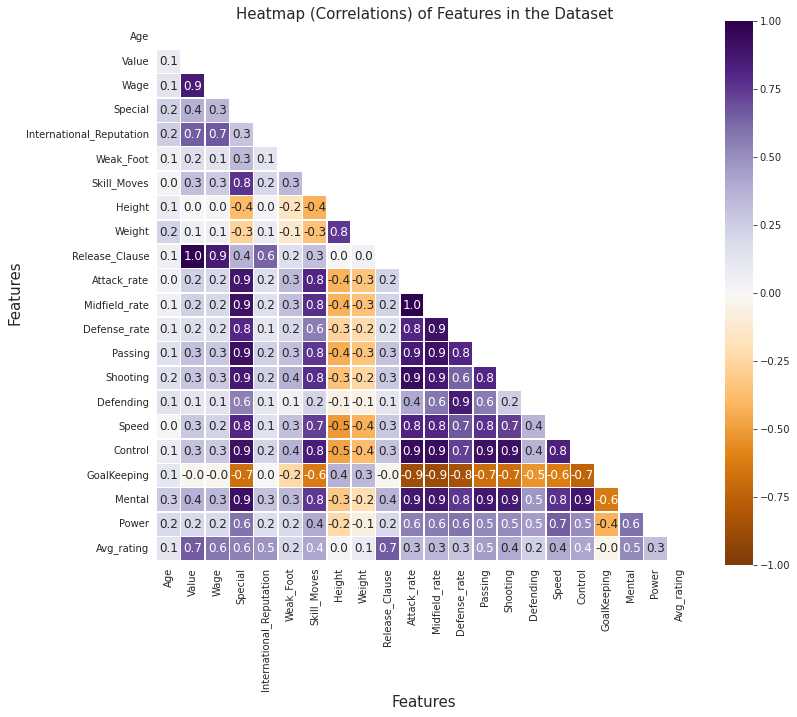

In [310]:
dataset_corr = data.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix. Only bottom left corner valued. 
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn. 
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

### Univariate Analysis

In [311]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<ipython-input-311-f296452f1146>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(
<ipython-input-311-f296452f1146>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(


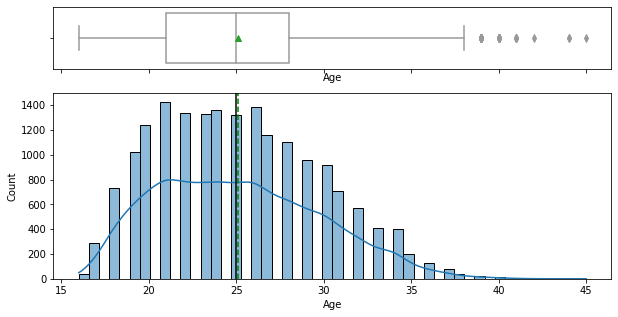

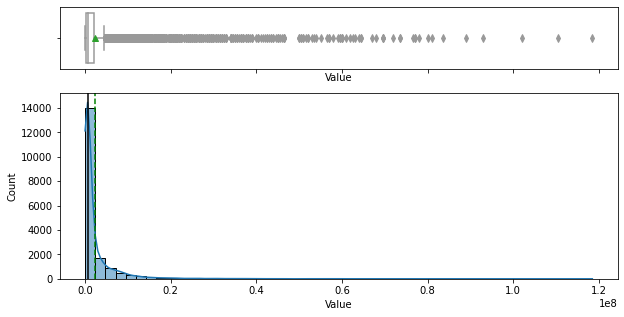

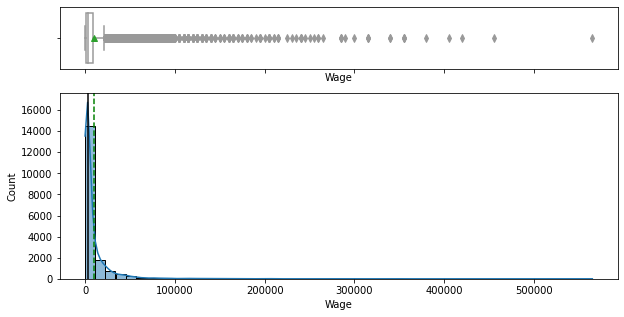

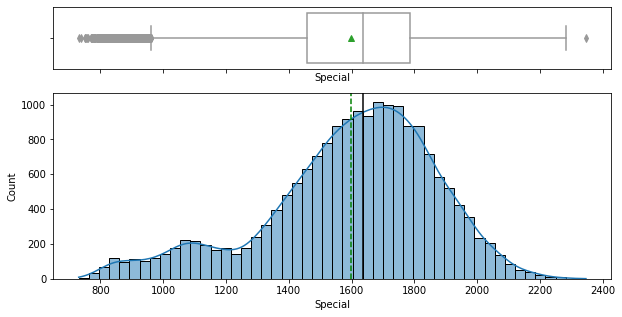

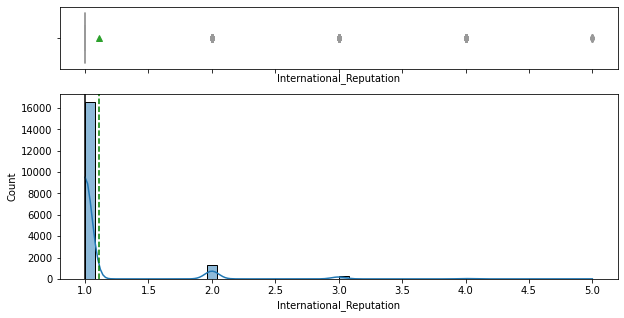

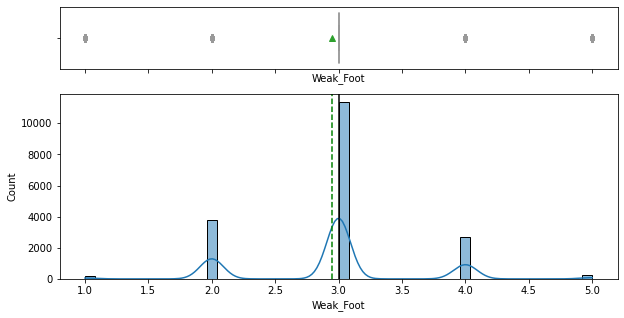

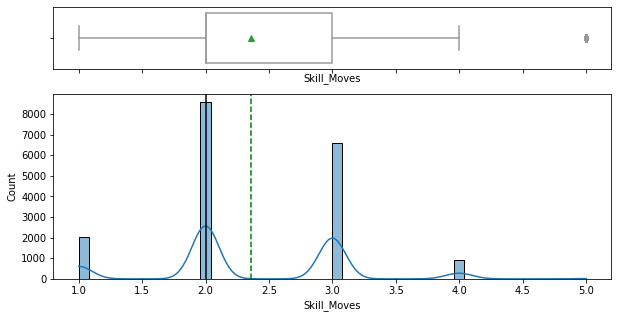

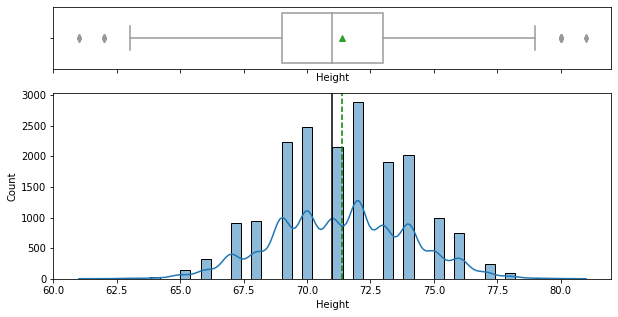

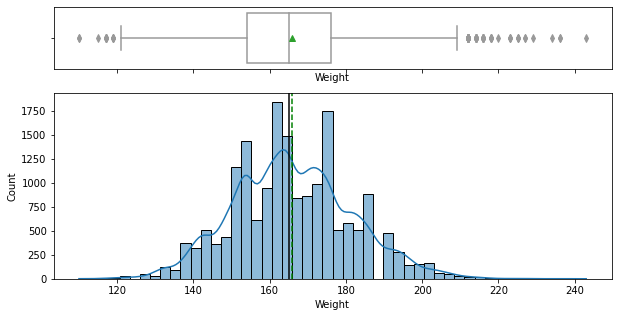

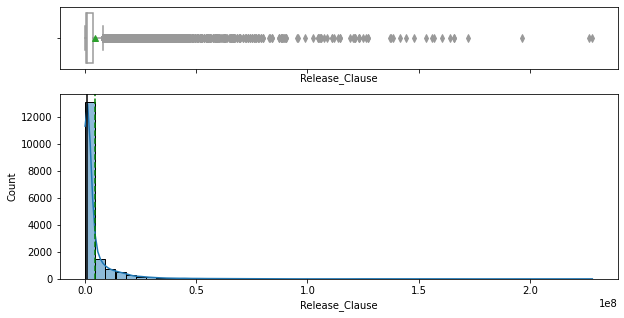

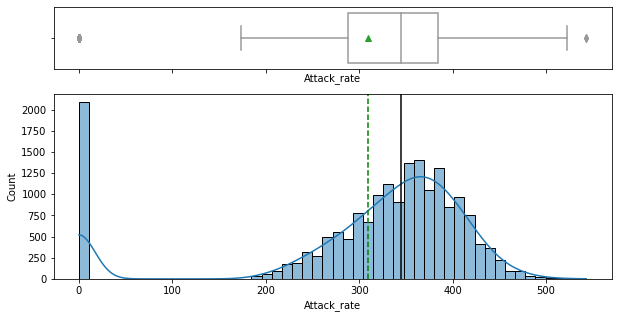

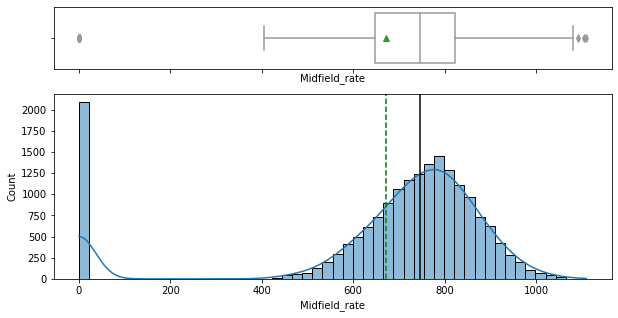

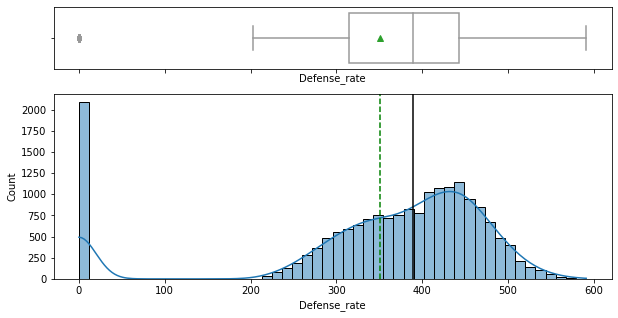

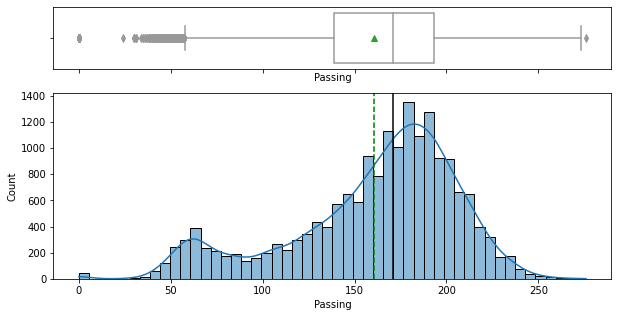

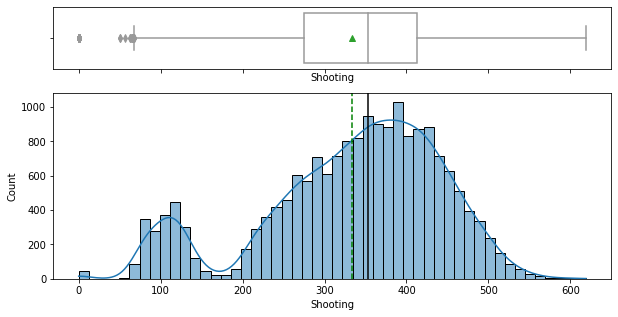

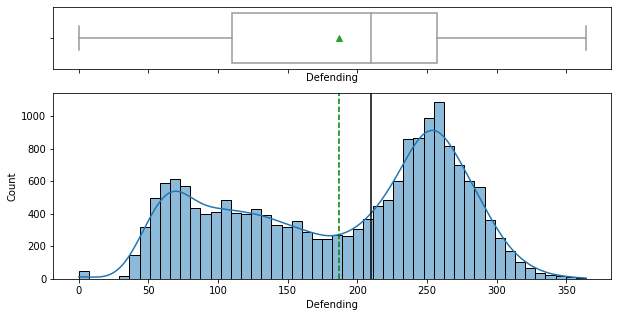

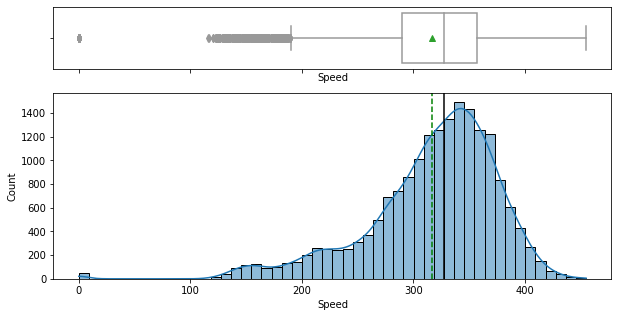

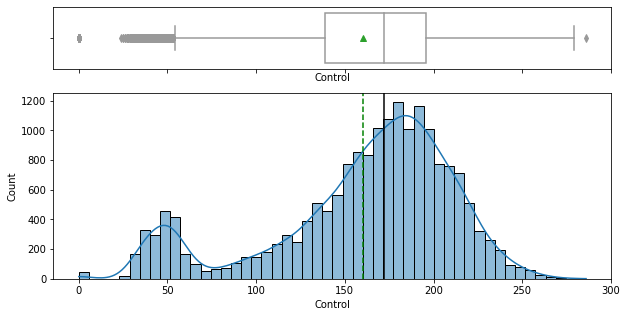

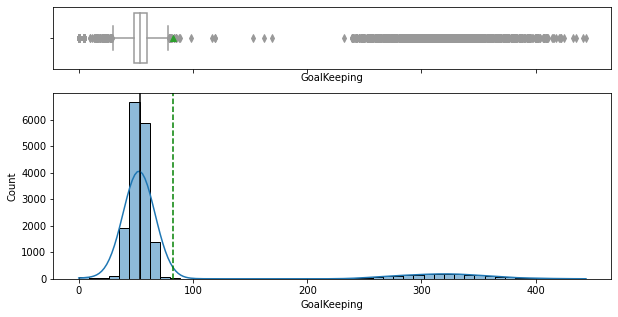

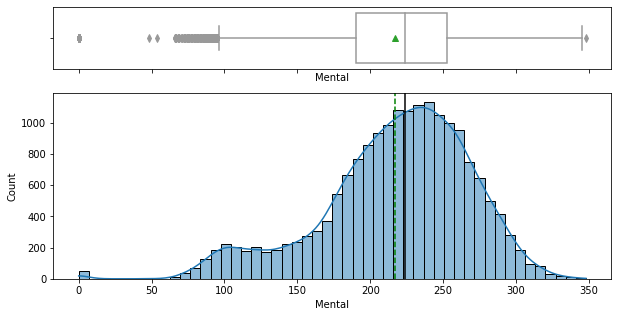

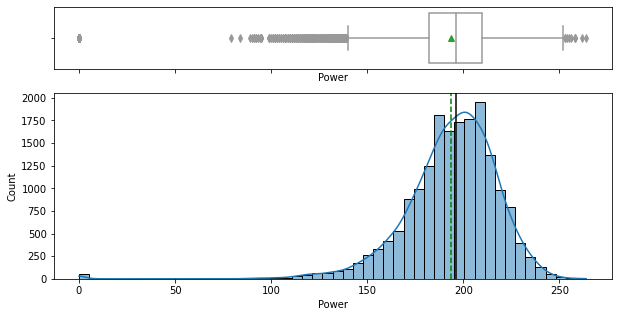

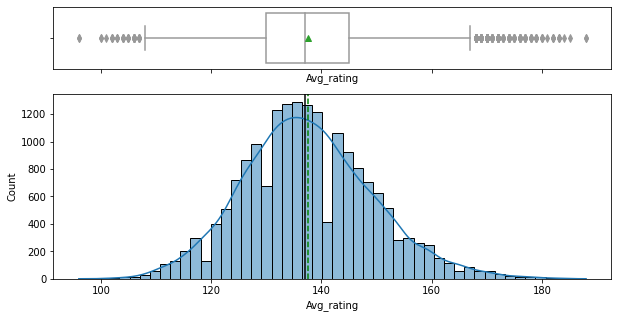

In [312]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))


In [313]:
# replacing 0, with 13000
data["Value"] = data["Value"].replace([0.0], 13000)

In [314]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(include=np.number).T.style.highlight_max(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
Age,18207.000000,25.122206,4.669943,16.000000,21.000000,25.000000,28.000000,45.000000
Value,18207.000000,2410875.816993,5594855.344909,10000.000000,300000.000000,675000.000000,2000000.000000,118500000.000000
Wage,18207.000000,9731.312133,21999.290406,0.000000,1000.000000,3000.000000,9000.000000,565000.000000
Special,18207.000000,1597.809908,272.586016,731.000000,1457.000000,1635.000000,1787.000000,2346.000000
International_Reputation,18159.000000,1.113222,0.394031,1.000000,1.000000,1.000000,1.000000,5.000000
Weak_Foot,18159.000000,2.947299,0.660456,1.000000,3.000000,3.000000,3.000000,5.000000
Skill_Moves,18159.000000,2.361308,0.756164,1.000000,2.000000,2.000000,3.000000,5.000000
Height,18159.000000,71.361253,2.649664,61.000000,69.000000,71.000000,73.000000,81.000000
Weight,18159.000000,165.979129,15.593344,110.000000,154.000000,165.000000,176.000000,243.000000
Release_Clause,16643.000000,4585060.986601,11118717.764832,13000.000000,525000.000000,1100000.000000,3500000.000000,228100000.000000


In [315]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=data[column], columns='% observations', normalize='columns'))


col_0,% observations
Name,
A. Abang,0.000055
A. Abdellaoui,0.000055
A. Abdennour,0.000055
A. Abdi,0.000055
A. Abdu Jaber,0.000055
...,...
Óscar Gil,0.000055
Óscar Pinchi,0.000055
Óscar Plano,0.000055


col_0,% observations
Nationality,
Afghanistan,0.000220
Albania,0.002197
Algeria,0.003295
Andorra,0.000055
Angola,0.000824
Antigua & Barbuda,0.000220
Argentina,0.051464
Armenia,0.000549
Australia,0.012962


col_0,% observations
Club,
SSV Jahn Regensburg,0.001614
1. FC Heidenheim 1846,0.001558
1. FC Kaiserslautern,0.001447
1. FC Köln,0.001558
1. FC Magdeburg,0.001447
...,...
Zagłębie Sosnowiec,0.001392
Çaykur Rizespor,0.001670
Örebro SK,0.001503


col_0,% observations
Preferred_Foot,
Left,0.231896
Right,0.768104


col_0,% observations
Body_Type,
Akinfenwa,0.000055
C. Ronaldo,0.000055
Courtois,0.000055
Lean,0.353378
Messi,0.000055
Neymar,0.000055
Normal,0.583457
PLAYER_BODY_TYPE_25,0.000055
Shaqiri,0.000055


col_0,% observations
Position,
CAM,0.052791
CB,0.097978
CDM,0.052240
CF,0.004078
CM,0.076817
GK,0.111589
LAM,0.001157
LB,0.072850
LCB,0.035708


col_0,% observations
Loaned_From,
1. FC Köln,0.000791
1. FC Union Berlin,0.001582
1. FSV Mainz 05,0.002373
ADO Den Haag,0.000791
AFC Wimbledon,0.000791
...,...
West Ham United,0.006329
Wigan Athletic,0.004747
Wolverhampton Wanderers,0.008703


col_0,% observations
Contract_Valid_Until,
2018,0.049447
2019,0.268947
2020,0.224746
2021,0.243331
2022,0.082431
2023,0.058768
2024,0.001284
2025,0.000391
2026,0.000112


col_0,% observations
Joined_year,
1991.0,0.000060
1998.0,0.000180
1999.0,0.000060
2000.0,0.000120
2001.0,0.000120
2002.0,0.000600
2003.0,0.000781
2004.0,0.000721
2005.0,0.001021


col_0,% observations
Workrate_attack,
High,0.269123
Low,0.050774
Medium,0.680104


col_0,% observations
Workrate_defense,
High,0.173137
Low,0.087174
Medium,0.739688


In [316]:
data[data["Wage"] == 0]

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating
452,L. Paredes,24,Argentina,NaN,13000.0,0.0,2122,Right,2.0,4.0,4.0,Normal,CM,NaT,NaN,NaN,71.0,165.0,NaN,NaN,Medium,Medium,438.0,1001.0,514.0,242.0,485.0,292.0,374.0,239.0,48.0,309.0,207.0,165
538,A. Granqvist,33,Sweden,NaN,13000.0,0.0,1797,Right,2.0,4.0,2.0,Normal,LCB,NaT,NaN,NaN,76.0,185.0,NaN,NaN,High,Medium,360.0,814.0,513.0,189.0,421.0,326.0,293.0,148.0,53.0,262.0,183.0,160
568,A. Lunev,26,Russia,NaN,13000.0,0.0,1217,Right,1.0,3.0,1.0,Normal,GK,NaT,NaN,NaN,74.0,176.0,NaN,NaN,Medium,Medium,0.0,0.0,0.0,73.0,113.0,70.0,251.0,50.0,380.0,169.0,180.0,160
677,I. Smolnikov,29,Russia,NaN,13000.0,0.0,2038,Right,2.0,3.0,3.0,Lean,RB,NaT,NaN,NaN,70.0,154.0,NaN,NaN,High,High,426.0,962.0,531.0,227.0,398.0,303.0,422.0,193.0,52.0,287.0,229.0,158
874,A. Dzyuba,29,Russia,NaN,13000.0,0.0,1810,Right,2.0,3.0,3.0,Stocky,ST,NaT,NaN,NaN,77.0,201.0,NaN,NaN,High,Medium,453.0,851.0,344.0,187.0,522.0,85.0,333.0,212.0,57.0,296.0,188.0,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,V. Kaith,21,India,NaN,13000.0,0.0,838,Right,1.0,2.0,1.0,Normal,GK,NaT,NaN,NaN,74.0,176.0,NaN,NaN,Medium,Medium,0.0,0.0,0.0,45.0,86.0,41.0,156.0,39.0,274.0,87.0,139.0,119
17215,K. Taimi,26,Finland,NaN,13000.0,0.0,1366,Right,1.0,3.0,2.0,Normal,RB,NaT,NaN,NaN,76.0,187.0,NaN,NaN,Medium,High,270.0,587.0,379.0,122.0,252.0,227.0,283.0,120.0,53.0,166.0,179.0,112
17339,S. Passi,23,India,NaN,13000.0,0.0,1321,Right,1.0,3.0,2.0,Normal,NaN,NaT,NaN,NaN,69.0,143.0,NaN,NaN,Medium,Low,0.0,0.0,0.0,106.0,331.0,92.0,299.0,133.0,46.0,184.0,175.0,117
17436,D. Lalhlimpuia,20,India,NaN,13000.0,0.0,1270,Right,1.0,3.0,2.0,Normal,NaN,NaT,NaN,NaN,72.0,168.0,NaN,NaN,Medium,Medium,0.0,0.0,0.0,94.0,347.0,74.0,271.0,132.0,49.0,167.0,182.0,121


In [317]:
data[data["Wage"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,241.0,26.406639,4.107995,18.0,23.0,26.0,29.0,41.0
Value,241.0,13000.000000,0.000000,13000.0,13000.0,13000.0,13000.0,13000.0
Wage,241.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Special,241.0,1582.456432,263.808862,838.0,1450.0,1619.0,1772.0,2122.0
International_Reputation,241.0,1.062241,0.258734,1.0,1.0,1.0,1.0,3.0
Weak_Foot,241.0,2.950207,0.687394,1.0,3.0,3.0,3.0,5.0
Skill_Moves,241.0,2.244813,0.737552,1.0,2.0,2.0,3.0,5.0
Height,241.0,71.377593,2.649402,65.0,69.0,72.0,73.0,78.0
Weight,241.0,166.742739,14.783726,132.0,157.0,165.0,176.0,207.0
Release_Clause,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
# replacing 0, with 13000
data["Wage"] = data["Wage"].replace([0.0], 13000)

In [319]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Value', 'Wage', 'Special',
       'Preferred_Foot', 'International_Reputation', 'Weak_Foot',
       'Skill_Moves', 'Body_Type', 'Position', 'Joined', 'Loaned_From',
       'Contract_Valid_Until', 'Height', 'Weight', 'Release_Clause',
       'Joined_year', 'Workrate_attack', 'Workrate_defense', 'Attack_rate',
       'Midfield_rate', 'Defense_rate', 'Passing', 'Shooting', 'Defending',
       'Speed', 'Control', 'GoalKeeping', 'Mental', 'Power', 'Avg_rating'],
      dtype='object')

In [320]:
data[data["Body_Type"] == 'PLAYER_BODY_TYPE_25']

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating
26,M. Salah,26,Egypt,Liverpool,69500000.0,255000.0,2146,Left,3.0,3.0,4.0,PLAYER_BODY_TYPE_25,RM,2017-07-01,NaN,2023,69.0,157.0,137300000.0,2017.0,High,Medium,507.0,1042.0,443.0,232.0,503.0,177.0,451.0,260.0,62.0,326.0,226.0,177


In [321]:
data['Body_Type'].value_counts(dropna=False)

Normal                 10595
Lean                    6417
Stocky                  1140
NaN                       48
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body_Type, dtype: int64

In [322]:
data.loc[data['Body_Type'] == 'PLAYER_BODY_TYPE_25', 'Body_Type'] = 'Lean'
data.loc[data['Body_Type'] == 'Neymar', 'Body_Type'] = 'Lean'
data.loc[data['Body_Type'] == 'Shaqiri', 'Body_Type'] = 'Stocky'
data.loc[data['Body_Type'] == 'Messi', 'Body_Type'] = 'Stocky'
data.loc[data['Body_Type'] == 'C. Ronaldo', 'Body_Type'] = 'Lean'
data.loc[data['Body_Type'] == 'Courtois', 'Body_Type'] = 'Lean'
data.loc[data['Body_Type'] == 'Akinfenwa', 'Body_Type'] = 'Stocky'
# why do these work with NaNs?

data['Body_Type'].value_counts(dropna=False)

Normal    10595
Lean       6421
Stocky     1143
NaN          48
Name: Body_Type, dtype: int64

In [323]:
# replacing 0, with 13000
data["Body_Type"] = data["Body_Type"].replace(['Akinfenwa'], 'Stocky')

In [324]:
data['Body_Type'].value_counts(dropna=False)

Normal    10595
Lean       6421
Stocky     1143
NaN          48
Name: Body_Type, dtype: int64

## Binning Countries

In [325]:
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [326]:
%pip install pycountry 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [327]:
%pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [328]:
# replacing Nationality
data["Nationality"] = data["Nationality"].replace(['England'], 'United Kingdom of Great Britain and Northern Ireland')
data["Nationality"] = data["Nationality"].replace(['Wales'], 'United Kingdom of Great Britain and Northern Ireland')
data["Nationality"] = data["Nationality"].replace(['Bosnia Herzegovina'], 'United Kingdom of Great Britain and Northern Ireland')
data["Nationality"] = data["Nationality"].replace(['Korea Republic'], 'Japan')
data["Nationality"] = data["Nationality"].replace(['Scotland'], 'United Kingdom of Great Britain and Northern Ireland')
data["Nationality"] = data["Nationality"].replace(['Central African Rep.'], 'Central African Republic')
data["Nationality"] = data["Nationality"].replace(['DR Congo'], 'Congo')
data["Nationality"] = data["Nationality"].replace(['Republic of Ireland'], 'Ireland')
data["Nationality"] = data["Nationality"].replace(['FYR Macedonia'], 'North Macedonia')
data["Nationality"] = data["Nationality"].replace(['China PR'], 'China')
data["Nationality"] = data["Nationality"].replace(['Guinea Bissau'], 'Guinea')
data["Nationality"] = data["Nationality"].replace(['Kosovo'], 'Albania')
data["Nationality"] = data["Nationality"].replace(['Northern Ireland'], 'United Kingdom of Great Britain and Northern Ireland')
data["Nationality"] = data["Nationality"].replace(['Curacao'], 'Netherlands')
data.loc[data['Nationality'] == 'Trinidad & Tobago', 'Nationality'] = 'Trinidad and Tobago'
data.loc[data['Nationality'] == 'São Tomé & Príncipe', 'Nationality'] = 'São Tomé and Príncipe'
data.loc[data['Nationality'] == 'Antigua & Barbuda', 'Nationality'] = 'Antigua and Barbuda'
data["Nationality"] = data["Nationality"].replace(['Korea DPR'], 'Japan')
data["Nationality"] = data["Nationality"].replace(['St Kitts Nevis'], 'Saint Kitts and Nevis')
data["Nationality"] = data["Nationality"].replace(['St Lucia'], 'Saint Lucia')



In [329]:
import pycountry_convert as pc

In [330]:
def convert(row):
    # convert country name to country code
    country_code = pc.country_name_to_country_alpha2(row.Nationality, cn_name_format = 'default')
    # convert cn_code to continent code
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    return continent_code

In [331]:
data['Nationality'] = data.apply(convert, axis = 1)

In [332]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [333]:
data['Nationality'].value_counts(dropna=False)

EU    10587
SA     3191
AS     2005
AF     1215
NA      926
OC      283
Name: Nationality, dtype: int64

In [334]:
#df.loc[df['Nationality'] == 'EU', 'Nationality'] = 'Europe'
#df.loc[df['Nationality'] == 'SA', 'Nationality'] = 'South_America'
#df.loc[df['Nationality'] == 'AS', 'Nationality'] = 'Asia'
#df.loc[df['Nationality'] == 'AF', 'Nationality'] = 'Africa'
#df.loc[df['Nationality'] == 'NA', 'Nationality'] = 'North_America'
#df.loc[df['Nationality'] == 'OC', 'Nationality'] = 'Oceania'


In [335]:
continents = {
    "EU" : "Europe",
    "SA" : "South_America",
    "AS" : "Asia",
    "AF" : "Africa",
    "NA" : "North_America",
    "OC" : "Oceania"
}

data['Continents'] = data['Nationality'].map(continents)

In [336]:
data.head()

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents
0,L. Messi,31,SA,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Stocky,RF,2004-07-01,NaN,2021,67.0,159.0,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188,South_America
1,Cristiano Ronaldo,33,EU,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,Lean,ST,2018-07-10,NaN,2022,74.0,183.0,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188,Europe
2,Neymar Jr,26,SA,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Lean,LW,2017-08-03,NaN,2022,69.0,150.0,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185,South_America
3,De Gea,27,EU,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,76.0,168.0,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184,Europe
4,K. De Bruyne,27,EU,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,71.0,154.0,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183,Europe


## Binning the Height


In [337]:
# Drop unwanted columns
data.drop(['Nationality'],axis=1,inplace=True)

In [338]:
data.head()

,Name,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents
0,L. Messi,31,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Stocky,RF,2004-07-01,NaN,2021,67.0,159.0,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188,South_America
1,Cristiano Ronaldo,33,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,Lean,ST,2018-07-10,NaN,2022,74.0,183.0,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188,Europe
2,Neymar Jr,26,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Lean,LW,2017-08-03,NaN,2022,69.0,150.0,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185,South_America
3,De Gea,27,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,76.0,168.0,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184,Europe
4,K. De Bruyne,27,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,71.0,154.0,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183,Europe


### Missing Values

In [339]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
Loaned_From,16943,0.930576
Release_Clause,1564,0.085901
Joined_year,1553,0.085297
Joined,1553,0.085297
Contract_Valid_Until,289,0.015873
Club,241,0.013237
Position,60,0.003295
Preferred_Foot,48,0.002636
International_Reputation,48,0.002636
Weak_Foot,48,0.002636


In [340]:
data.loc[(data['Release_Clause'].isnull()) |
              (data['Joined_year'].isnull()) |
       (data['Height'].isnull()) |
       (data['Skill_Moves'].isnull()) |
       (data['Contract_Valid_Until'].isnull()) |
       (data['International_Reputation'].isnull()) |
       (data['Weak_Foot'].isnull()) |
        (data['Weight'].isnull()) |
         (data['Club'].isnull()) |
         (data['Body_Type'].isnull()) |
         (data['Loaned_From'].isnull()) |
         (data['Joined'].isnull()) |
         (data['Position'].isnull()) |
              (data['Workrate_attack'].isnull()) |
              (data['Workrate_defense'].isnull())]

,Name,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents
0,L. Messi,31,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Stocky,RF,2004-07-01,NaN,2021,67.0,159.0,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188,South_America
1,Cristiano Ronaldo,33,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,Lean,ST,2018-07-10,NaN,2022,74.0,183.0,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188,Europe
2,Neymar Jr,26,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Lean,LW,2017-08-03,NaN,2022,69.0,150.0,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185,South_America
3,De Gea,27,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,76.0,168.0,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184,Europe
4,K. De Bruyne,27,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,71.0,154.0,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Lean,CM,2017-05-03,NaN,2019,69.0,134.0,143000.0,2017.0,Medium,Medium,258.0,581.0,313.0,128.0,261.0,181.0,260.0,115.0,47.0,182.0,178.0,112,Europe
18203,N. Christoffersson,19,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Normal,ST,2018-03-19,NaN,2020,75.0,170.0,113000.0,2018.0,Medium,Medium,261.0,472.0,214.0,91.0,286.0,72.0,201.0,111.0,45.0,168.0,166.0,110,Europe
18204,B. Worman,16,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Normal,ST,2017-07-01,NaN,2021,68.0,148.0,165000.0,2017.0,Medium,Medium,273.0,514.0,218.0,91.0,296.0,71.0,291.0,127.0,40.0,164.0,150.0,114,Europe
18205,D. Walker-Rice,17,Tranmere Rovers,60000.0,1000.0,1228,Right,1.0,3.0,2.0,Lean,RW,2018-04-24,NaN,2019,70.0,154.0,143000.0,2018.0,Medium,Medium,279.0,534.0,235.0,118.0,309.0,94.0,234.0,137.0,51.0,170.0,161.0,113,Europe


In [341]:
# Look at fare by different passenger class levels
data.groupby('Loaned_From')['Wage'].describe()

,count,mean,std,min,25%,50%,75%,max
Loaned_From,,,,,,,,
1. FC Köln,1.0,3000.000000,NaN,3000.0,3000.0,3000.0,3000.0,3000.0
1. FC Union Berlin,2.0,5000.000000,2828.427125,3000.0,4000.0,5000.0,6000.0,7000.0
1. FSV Mainz 05,3.0,9666.666667,7023.769169,3000.0,6000.0,9000.0,13000.0,17000.0
ADO Den Haag,1.0,1000.000000,NaN,1000.0,1000.0,1000.0,1000.0,1000.0
AFC Wimbledon,1.0,1000.000000,NaN,1000.0,1000.0,1000.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...
West Ham United,8.0,23625.000000,15518.997574,8000.0,13500.0,15500.0,36250.0,51000.0
Wigan Athletic,6.0,11500.000000,8826.097665,3000.0,5000.0,10500.0,13750.0,27000.0
Wolverhampton Wanderers,11.0,16909.090909,7569.075841,5000.0,13500.0,16000.0,20500.0,30000.0


In [342]:
PostedOn = data[(data['Wage'] == 1000)]
PostedOn

,Name,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents
276,Mário Fernandes,27,PFC CSKA Moscow,18500000.0,1000.0,2102,Right,2.0,3.0,3.0,Lean,RB,2012-07-01,NaN,2022,74.0,176.0,40700000.0,2012.0,High,High,438.0,987.0,557.0,228.0,405.0,327.0,410.0,222.0,64.0,302.0,220.0,164,Europe
286,Taison,30,Shakhtar Donetsk,21000000.0,1000.0,2055,Right,2.0,3.0,4.0,Lean,LM,2013-01-11,NaN,2021,68.0,141.0,44100000.0,2013.0,Medium,Medium,474.0,987.0,427.0,225.0,525.0,180.0,432.0,224.0,53.0,283.0,207.0,164,South_America
288,Marlos,30,Shakhtar Donetsk,21000000.0,1000.0,2075,Left,2.0,4.0,5.0,Normal,RM,2014-07-04,NaN,2019,69.0,152.0,44100000.0,2014.0,Medium,Medium,471.0,998.0,430.0,230.0,507.0,187.0,414.0,257.0,49.0,301.0,214.0,164,Europe
301,V. Ćorluka,32,Lokomotiv Moscow,12500000.0,1000.0,1909,Right,3.0,3.0,3.0,Normal,LCB,2012-06-27,NaN,2020,76.0,185.0,26300000.0,2012.0,High,Medium,366.0,868.0,535.0,210.0,388.0,321.0,328.0,207.0,56.0,264.0,213.0,164,Europe
381,F. Smolov,28,Lokomotiv Moscow,18500000.0,1000.0,1971,Right,1.0,4.0,4.0,Lean,ST,2018-08-09,NaN,2022,74.0,176.0,38900000.0,2018.0,High,Medium,474.0,915.0,362.0,195.0,537.0,110.0,396.0,233.0,66.0,299.0,208.0,162,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Lean,CM,2017-05-03,NaN,2019,69.0,134.0,143000.0,2017.0,Medium,Medium,258.0,581.0,313.0,128.0,261.0,181.0,260.0,115.0,47.0,182.0,178.0,112,Europe
18203,N. Christoffersson,19,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Normal,ST,2018-03-19,NaN,2020,75.0,170.0,113000.0,2018.0,Medium,Medium,261.0,472.0,214.0,91.0,286.0,72.0,201.0,111.0,45.0,168.0,166.0,110,Europe
18204,B. Worman,16,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Normal,ST,2017-07-01,NaN,2021,68.0,148.0,165000.0,2017.0,Medium,Medium,273.0,514.0,218.0,91.0,296.0,71.0,291.0,127.0,40.0,164.0,150.0,114,Europe
18205,D. Walker-Rice,17,Tranmere Rovers,60000.0,1000.0,1228,Right,1.0,3.0,2.0,Lean,RW,2018-04-24,NaN,2019,70.0,154.0,143000.0,2018.0,Medium,Medium,279.0,534.0,235.0,118.0,309.0,94.0,234.0,137.0,51.0,170.0,161.0,113,Europe


In [343]:
# can add custom labels
data['height_bin'] = pd.cut(
    data['Height'], [-np.inf, 5*12, 5*12+6, 6*12, np.inf], 
    labels = ["Under 5'", "5' to 5'6", "5'6 to 6'", "Over 6'"]
)
data.drop(['Height'], axis=1, inplace=True)
data['height_bin'].value_counts(dropna=False)


5'6 to 6'    11608
Over 6'       6034
5' to 5'6      517
NaN             48
Under 5'         0
Name: height_bin, dtype: int64

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Club                      17966 non-null  object        
 3   Value                     18207 non-null  float64       
 4   Wage                      18207 non-null  float64       
 5   Special                   18207 non-null  int64         
 6   Preferred_Foot            18159 non-null  object        
 7   International_Reputation  18159 non-null  float64       
 8   Weak_Foot                 18159 non-null  float64       
 9   Skill_Moves               18159 non-null  float64       
 10  Body_Type                 18159 non-null  object        
 11  Position                  18147 non-null  object        
 12  Joined            

### Changing units
We'll change the units of `Weight` to be in kg instead of lbs

In [345]:
data['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [346]:
data['Weight'] = data['Weight'].apply(lambda wt: round(wt * 0.4535, 2))
data['Weight'].head()

0    72.11
1    82.99
2    68.03
3    76.19
4    69.84
Name: Weight, dtype: float64

### Making Objects into categorical types

In [347]:
data.dtypes

Name                                object
Age                                  int64
Club                                object
Value                              float64
Wage                               float64
Special                              int64
Preferred_Foot                      object
International_Reputation           float64
Weak_Foot                          float64
Skill_Moves                        float64
Body_Type                           object
Position                            object
Joined                      datetime64[ns]
Loaned_From                         object
Contract_Valid_Until                object
Weight                             float64
Release_Clause                     float64
Joined_year                         object
Workrate_attack                     object
Workrate_defense                    object
Attack_rate                        float64
Midfield_rate                      float64
Defense_rate                       float64
Passing    

In [348]:
cat_vars = ['Preferred_Foot', 'Body_Type', 'Position',
            'Workrate_attack', 'Workrate_defense','height_bin','Name','Club','Continents','Loaned_From','Contract_Valid_Until','Joined_year']
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    data[colname] = data[colname].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  category      
 1   Age                       18207 non-null  int64         
 2   Club                      17966 non-null  category      
 3   Value                     18207 non-null  float64       
 4   Wage                      18207 non-null  float64       
 5   Special                   18207 non-null  int64         
 6   Preferred_Foot            18159 non-null  category      
 7   International_Reputation  18159 non-null  float64       
 8   Weak_Foot                 18159 non-null  float64       
 9   Skill_Moves               18159 non-null  float64       
 10  Body_Type                 18159 non-null  category      
 11  Position                  18147 non-null  category      
 12  Joined            

### Text processing


In [349]:
data.sample(n=6)

,Name,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents,height_bin
8213,S. Benyamina,28,Pogoń Szczecin,800000.0,3000.0,1616,Right,1.0,3.0,3.0,Lean,ST,2018-07-01,NaN,2020,78.91,1100000.0,2018.0,High,Medium,384.0,695.0,323.0,121.0,424.0,111.0,340.0,172.0,57.0,224.0,224.0,134,Europe,Over 6'
11582,Dêniro Prestes,30,Ceará Sporting Club,425000.0,5000.0,1526,Right,1.0,3.0,2.0,Normal,ST,2018-01-01,NaN,2021,82.08,786000.0,2018.0,Medium,Medium,360.0,644.0,280.0,118.0,430.0,86.0,274.0,161.0,75.0,252.0,195.0,128,South_America,Over 6'
4316,Suso Santana,33,CD Tenerife,1400000.0,7000.0,1925,Right,1.0,3.0,4.0,Stocky,RM,2012-07-01,NaN,2019,62.13,2300000.0,2012.0,High,High,405.0,867.0,435.0,176.0,419.0,215.0,400.0,204.0,45.0,296.0,245.0,142,Europe,5'6 to 6'
9566,J. Rossiter,21,Rangers FC,1000000.0,9000.0,1695,Right,1.0,3.0,2.0,Lean,CDM,2016-07-01,NaN,2020,63.94,2000000.0,2016.0,Medium,High,339.0,782.0,443.0,172.0,334.0,260.0,324.0,168.0,46.0,243.0,206.0,144,Europe,5'6 to 6'
11969,A. Legzdins,31,Burnley,270000.0,8000.0,1072,Right,1.0,3.0,1.0,Normal,GK,2017-08-08,NaN,2020,89.79,513000.0,2017.0,Medium,Medium,0.0,0.0,0.0,62.0,116.0,49.0,205.0,49.0,316.0,161.0,174.0,128,Europe,Over 6'
15204,E. Bullaude,17,Godoy Cruz,425000.0,1000.0,1432,Right,1.0,3.0,2.0,Lean,ST,2018-10-19,NaN,2021,74.83,882000.0,2018.0,Medium,Medium,354.0,678.0,258.0,156.0,378.0,65.0,309.0,179.0,43.0,194.0,163.0,135,South_America,5'6 to 6'


In [350]:
df1 = data.loc[:, ~data.columns.isin(['Joined', 'Name', 'Club'])]
#df1 = data.loc[:, data.columns!='Joined']
df1

,Age,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Loaned_From,Contract_Valid_Until,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents,height_bin
0,31,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Stocky,RF,NaN,2021,72.11,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188,South_America,5'6 to 6'
1,33,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,Lean,ST,NaN,2022,82.99,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188,Europe,Over 6'
2,26,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Lean,LW,NaN,2022,68.03,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185,South_America,5'6 to 6'
3,27,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,NaN,2020,76.19,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184,Europe,Over 6'
4,27,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,NaN,2023,69.84,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183,Europe,5'6 to 6'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Lean,CM,NaN,2019,60.77,143000.0,2017.0,Medium,Medium,258.0,581.0,313.0,128.0,261.0,181.0,260.0,115.0,47.0,182.0,178.0,112,Europe,5'6 to 6'
18203,19,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Normal,ST,NaN,2020,77.09,113000.0,2018.0,Medium,Medium,261.0,472.0,214.0,91.0,286.0,72.0,201.0,111.0,45.0,168.0,166.0,110,Europe,Over 6'
18204,16,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Normal,ST,NaN,2021,67.12,165000.0,2017.0,Medium,Medium,273.0,514.0,218.0,91.0,296.0,71.0,291.0,127.0,40.0,164.0,150.0,114,Europe,5'6 to 6'
18205,17,60000.0,1000.0,1228,Right,1.0,3.0,2.0,Lean,RW,NaN,2019,69.84,143000.0,2018.0,Medium,Medium,279.0,534.0,235.0,118.0,309.0,94.0,234.0,137.0,51.0,170.0,161.0,113,Europe,5'6 to 6'


In [351]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       18207 non-null  int64   
 1   Value                     18207 non-null  float64 
 2   Wage                      18207 non-null  float64 
 3   Special                   18207 non-null  int64   
 4   Preferred_Foot            18159 non-null  category
 5   International_Reputation  18159 non-null  float64 
 6   Weak_Foot                 18159 non-null  float64 
 7   Skill_Moves               18159 non-null  float64 
 8   Body_Type                 18159 non-null  category
 9   Position                  18147 non-null  category
 10  Loaned_From               1264 non-null   category
 11  Contract_Valid_Until      17918 non-null  category
 12  Weight                    18159 non-null  float64 
 13  Release_Clause            16643 non-null  floa

In [352]:
# how many players are in clubs that start with 'FC'?
data['Club'].str.startswith('FC').sum()

1007

In [353]:
data.shape

(18207, 34)

In [354]:
# how many letters and words in the unique club names?
# doing i == i as a quick check for NaNs
# using .title() in case of capitalization issues
club_data = pd.DataFrame(
    data = [(i, len(i), len(i.split())) if i == i else (i, 0, 0)
            for i in data['Club'].str.strip().str.title().unique()],
    columns = ['Club', 'Number of Letters', 'Number of Words']
)
club_data.head()

,Club,Number of Letters,Number of Words
0,Fc Barcelona,12,2
1,Juventus,8,1
2,Paris Saint-Germain,19,2
3,Manchester United,17,2
4,Manchester City,15,2


## Dimensionality Reduction Techniques

In [355]:
data['Avg_rating'] = data['Avg_rating'].astype('float64')
data['Release_Clause'] = data['Release_Clause'].astype('float64')
data['Special'] = data['Special'].astype('float64')
data['Age'] = data['Age'].astype('float64')

In [356]:
data.head()

,Name,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Weight,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents,height_bin
0,L. Messi,31.0,FC Barcelona,110500000.0,565000.0,2202.0,Left,5.0,4.0,4.0,Stocky,RF,2004-07-01,NaN,2021,72.11,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188.0,South_America,5'6 to 6'
1,Cristiano Ronaldo,33.0,Juventus,77000000.0,405000.0,2228.0,Right,5.0,4.0,5.0,Lean,ST,2018-07-10,NaN,2022,82.99,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188.0,Europe,Over 6'
2,Neymar Jr,26.0,Paris Saint-Germain,118500000.0,290000.0,2143.0,Right,5.0,5.0,5.0,Lean,LW,2017-08-03,NaN,2022,68.03,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185.0,South_America,5'6 to 6'
3,De Gea,27.0,Manchester United,72000000.0,260000.0,1471.0,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,76.19,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184.0,Europe,Over 6'
4,K. De Bruyne,27.0,Manchester City,102000000.0,355000.0,2281.0,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,69.84,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183.0,Europe,5'6 to 6'


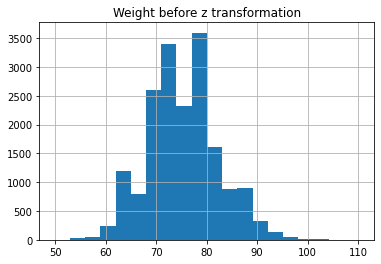

In [357]:
data['Weight'].hist(bins=20)
plt.title('Weight before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']

In [358]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [359]:
std_scaler = StandardScaler()

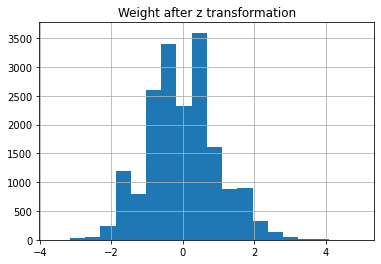

In [360]:
data['Weight_z_std'] = std_scaler.fit_transform(data[['Weight']])
data['Weight_z_std'].hist(bins=20)
plt.title('Weight after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
data.drop(['Weight'], axis=1, inplace=True)

In [361]:
df2= data[['Age',                                 
'Value',                              
'Wage',                               
'Special',                              
'International_Reputation',           
'Weak_Foot',                          
'Skill_Moves',                        
'Release_Clause',                     
'Attack_rate',                        
'Midfield_rate',                      
'Defense_rate',                       
'Passing',                            
'Shooting',                           
'Defending',                          
'Speed',                              
'Control',                           
'GoalKeeping',                        
'Mental',                             
'Power',                              
'Avg_rating',                           
'Weight_z_std']]          
df2            

,Age,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Release_Clause,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Weight_z_std
0,31.0,110500000.0,565000.0,2202.0,5.0,4.0,4.0,226500000.0,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188.0,-0.447152
1,33.0,77000000.0,405000.0,2228.0,5.0,4.0,5.0,127100000.0,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188.0,1.091481
2,26.0,118500000.0,290000.0,2143.0,5.0,5.0,5.0,228100000.0,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185.0,-1.024139
3,27.0,72000000.0,260000.0,1471.0,4.0,3.0,1.0,138600000.0,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184.0,0.129836
4,27.0,102000000.0,355000.0,2281.0,4.0,5.0,4.0,196400000.0,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183.0,-0.768171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19.0,60000.0,1000.0,1307.0,1.0,2.0,2.0,143000.0,258.0,581.0,313.0,128.0,261.0,181.0,260.0,115.0,47.0,182.0,178.0,112.0,-2.050836
18203,19.0,60000.0,1000.0,1098.0,1.0,2.0,2.0,113000.0,261.0,472.0,214.0,91.0,286.0,72.0,201.0,111.0,45.0,168.0,166.0,110.0,0.257112
18204,16.0,60000.0,1000.0,1189.0,1.0,3.0,2.0,165000.0,273.0,514.0,218.0,91.0,296.0,71.0,291.0,127.0,40.0,164.0,150.0,114.0,-1.152829
18205,17.0,60000.0,1000.0,1228.0,1.0,3.0,2.0,143000.0,279.0,534.0,235.0,118.0,309.0,94.0,234.0,137.0,51.0,170.0,161.0,113.0,-0.768171


In [362]:
df2.shape

(18207, 21)

In [363]:
data.columns

Index(['Name', 'Age', 'Club', 'Value', 'Wage', 'Special', 'Preferred_Foot',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Body_Type',
       'Position', 'Joined', 'Loaned_From', 'Contract_Valid_Until',
       'Release_Clause', 'Joined_year', 'Workrate_attack', 'Workrate_defense',
       'Attack_rate', 'Midfield_rate', 'Defense_rate', 'Passing', 'Shooting',
       'Defending', 'Speed', 'Control', 'GoalKeeping', 'Mental', 'Power',
       'Avg_rating', 'Continents', 'height_bin', 'Weight_z_std'],
      dtype='object')

## Handling Missing Values

In [364]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
Loaned_From,16943,0.930576
Release_Clause,1564,0.085901
Joined_year,1553,0.085297
Joined,1553,0.085297
Contract_Valid_Until,289,0.015873
Club,241,0.013237
Position,60,0.003295
Workrate_attack,48,0.002636
height_bin,48,0.002636
Workrate_defense,48,0.002636


In [365]:
data.loc[(data['Release_Clause'].isnull()) |
              (data['Joined_year'].isnull()) |
            (data['Skill_Moves'].isnull()) |
       (data['Contract_Valid_Until'].isnull()) |
       (data['International_Reputation'].isnull()) |
       (data['Weak_Foot'].isnull()) |
             (data['Club'].isnull()) |
         (data['Body_Type'].isnull()) |
         (data['Loaned_From'].isnull()) |
         (data['Joined'].isnull()) |
         (data['Position'].isnull()) |
              (data['Workrate_attack'].isnull()) |
              (data['Workrate_defense'].isnull())]

,Name,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents,height_bin,Weight_z_std
0,L. Messi,31.0,FC Barcelona,110500000.0,565000.0,2202.0,Left,5.0,4.0,4.0,Stocky,RF,2004-07-01,NaN,2021,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188.0,South_America,5'6 to 6',-0.447152
1,Cristiano Ronaldo,33.0,Juventus,77000000.0,405000.0,2228.0,Right,5.0,4.0,5.0,Lean,ST,2018-07-10,NaN,2022,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188.0,Europe,Over 6',1.091481
2,Neymar Jr,26.0,Paris Saint-Germain,118500000.0,290000.0,2143.0,Right,5.0,5.0,5.0,Lean,LW,2017-08-03,NaN,2022,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185.0,South_America,5'6 to 6',-1.024139
3,De Gea,27.0,Manchester United,72000000.0,260000.0,1471.0,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184.0,Europe,Over 6',0.129836
4,K. De Bruyne,27.0,Manchester City,102000000.0,355000.0,2281.0,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183.0,Europe,5'6 to 6',-0.768171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,Crewe Alexandra,60000.0,1000.0,1307.0,Right,1.0,2.0,2.0,Lean,CM,2017-05-03,NaN,2019,143000.0,2017.0,Medium,Medium,258.0,581.0,313.0,128.0,261.0,181.0,260.0,115.0,47.0,182.0,178.0,112.0,Europe,5'6 to 6',-2.050836
18203,N. Christoffersson,19.0,Trelleborgs FF,60000.0,1000.0,1098.0,Right,1.0,2.0,2.0,Normal,ST,2018-03-19,NaN,2020,113000.0,2018.0,Medium,Medium,261.0,472.0,214.0,91.0,286.0,72.0,201.0,111.0,45.0,168.0,166.0,110.0,Europe,Over 6',0.257112
18204,B. Worman,16.0,Cambridge United,60000.0,1000.0,1189.0,Right,1.0,3.0,2.0,Normal,ST,2017-07-01,NaN,2021,165000.0,2017.0,Medium,Medium,273.0,514.0,218.0,91.0,296.0,71.0,291.0,127.0,40.0,164.0,150.0,114.0,Europe,5'6 to 6',-1.152829
18205,D. Walker-Rice,17.0,Tranmere Rovers,60000.0,1000.0,1228.0,Right,1.0,3.0,2.0,Lean,RW,2018-04-24,NaN,2019,143000.0,2018.0,Medium,Medium,279.0,534.0,235.0,118.0,309.0,94.0,234.0,137.0,51.0,170.0,161.0,113.0,Europe,5'6 to 6',-0.768171


In [366]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['category']).columns:
    display(pd.crosstab(index=data[column], columns='% observations', normalize='columns'))

col_0,% observations
Name,
A. Abang,0.000055
A. Abdellaoui,0.000055
A. Abdennour,0.000055
A. Abdi,0.000055
A. Abdu Jaber,0.000055
...,...
Óscar Gil,0.000055
Óscar Pinchi,0.000055
Óscar Plano,0.000055


col_0,% observations
Club,
SSV Jahn Regensburg,0.001614
1. FC Heidenheim 1846,0.001558
1. FC Kaiserslautern,0.001447
1. FC Köln,0.001558
1. FC Magdeburg,0.001447
...,...
Zagłębie Sosnowiec,0.001392
Çaykur Rizespor,0.001670
Örebro SK,0.001503


col_0,% observations
Preferred_Foot,
Left,0.231896
Right,0.768104


col_0,% observations
Body_Type,
Lean,0.353599
Normal,0.583457
Stocky,0.062944


col_0,% observations
Position,
CAM,0.052791
CB,0.097978
CDM,0.052240
CF,0.004078
CM,0.076817
GK,0.111589
LAM,0.001157
LB,0.072850
LCB,0.035708


col_0,% observations
Loaned_From,
1. FC Köln,0.000791
1. FC Union Berlin,0.001582
1. FSV Mainz 05,0.002373
ADO Den Haag,0.000791
AFC Wimbledon,0.000791
...,...
West Ham United,0.006329
Wigan Athletic,0.004747
Wolverhampton Wanderers,0.008703


col_0,% observations
Contract_Valid_Until,
2018,0.049447
2019,0.268947
2020,0.224746
2021,0.243331
2022,0.082431
2023,0.058768
2024,0.001284
2025,0.000391
2026,0.000112


col_0,% observations
Joined_year,
1991.0,0.000060
1998.0,0.000180
1999.0,0.000060
2000.0,0.000120
2001.0,0.000120
2002.0,0.000600
2003.0,0.000781
2004.0,0.000721
2005.0,0.001021


col_0,% observations
Workrate_attack,
High,0.269123
Low,0.050774
Medium,0.680104


col_0,% observations
Workrate_defense,
High,0.173137
Low,0.087174
Medium,0.739688


col_0,% observations
Continents,
Africa,0.066733
Asia,0.110122
Europe,0.581480
North_America,0.050860
Oceania,0.015543
South_America,0.175262


col_0,% observations
height_bin,
5' to 5'6,0.028471
5'6 to 6',0.639242
Over 6',0.332287


In [367]:
# Is Loaned From missing at random?
data.groupby(data['Loaned_From'].isnull()).mean()

,Age,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Release_Clause,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Weight_z_std
Loaned_From,,,,,,,,,,,,,,,,,,,,,
False,23.375791,2.548441e+06,13439.082278,1635.958861,1.098892,3.005538,2.541139,NaN,334.585443,715.255538,360.337816,166.728639,356.565665,182.446994,326.265032,171.749209,72.104430,224.513449,195.500791,141.144778,-0.020301
True,25.252494,2.400613e+06,9639.615180,1594.963879,1.114294,2.942942,2.347854,4.585061e+06,307.702827,669.462728,349.437880,160.258868,332.163253,187.173405,316.376616,159.646875,82.869976,216.764268,193.732810,137.277519,0.001519


In [368]:
# What would an indicator variable for Va look like?
data.groupby(data['Loaned_From'].isnull())['Value'].mean()

Loaned_From
False    2.548441e+06
True     2.400613e+06
Name: Value, dtype: float64

In [369]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(include=np.number).T.style.highlight_max(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
Age,18207.000000,25.122206,4.669943,16.000000,21.000000,25.000000,28.000000,45.000000
Value,18207.000000,2410875.816993,5594855.344909,10000.000000,300000.000000,675000.000000,2000000.000000,118500000.000000
Wage,18207.000000,9903.388807,21973.325611,1000.000000,1000.000000,3000.000000,10000.000000,565000.000000
Special,18207.000000,1597.809908,272.586016,731.000000,1457.000000,1635.000000,1787.000000,2346.000000
International_Reputation,18159.000000,1.113222,0.394031,1.000000,1.000000,1.000000,1.000000,5.000000
Weak_Foot,18159.000000,2.947299,0.660456,1.000000,3.000000,3.000000,3.000000,5.000000
Skill_Moves,18159.000000,2.361308,0.756164,1.000000,2.000000,2.000000,3.000000,5.000000
Release_Clause,16643.000000,4585060.986601,11118717.764832,13000.000000,525000.000000,1100000.000000,3500000.000000,228100000.000000
Attack_rate,18207.000000,309.569122,123.306021,0.000000,288.000000,345.000000,384.000000,543.000000
Midfield_rate,18207.000000,672.641841,261.877875,0.000000,648.000000,747.000000,822.000000,1110.000000


### Fixing on Age

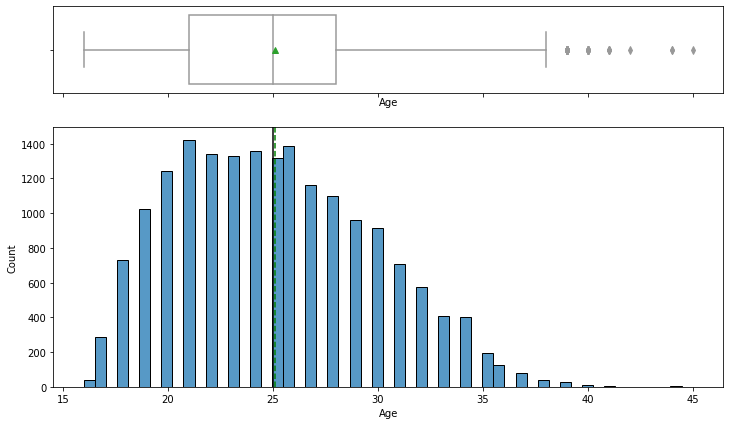

In [370]:
# observations on Age
histogram_boxplot(data, "Age")

In [371]:
data["Age"].clip(lower=18, inplace=True)

In [372]:
data["Age"].clip(upper=40, inplace=True)

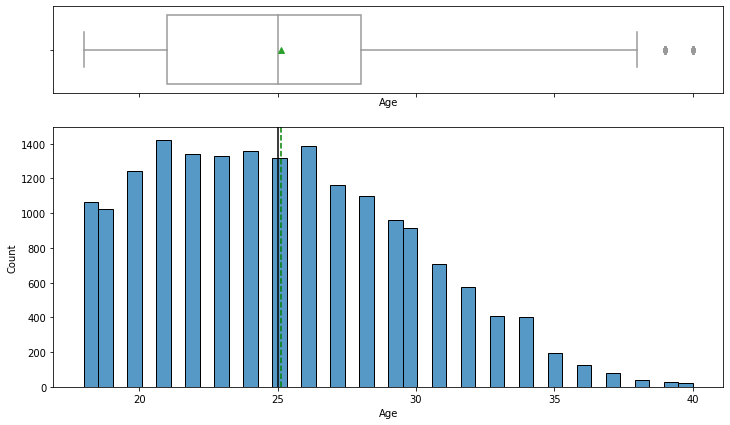

In [373]:
# observations on Age
histogram_boxplot(data, "Age")

In [374]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(include=np.number).T.style.highlight_max(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
Age,18207.000000,25.141594,4.631926,18.000000,21.000000,25.000000,28.000000,40.000000
Value,18207.000000,2410875.816993,5594855.344909,10000.000000,300000.000000,675000.000000,2000000.000000,118500000.000000
Wage,18207.000000,9903.388807,21973.325611,1000.000000,1000.000000,3000.000000,10000.000000,565000.000000
Special,18207.000000,1597.809908,272.586016,731.000000,1457.000000,1635.000000,1787.000000,2346.000000
International_Reputation,18159.000000,1.113222,0.394031,1.000000,1.000000,1.000000,1.000000,5.000000
Weak_Foot,18159.000000,2.947299,0.660456,1.000000,3.000000,3.000000,3.000000,5.000000
Skill_Moves,18159.000000,2.361308,0.756164,1.000000,2.000000,2.000000,3.000000,5.000000
Release_Clause,16643.000000,4585060.986601,11118717.764832,13000.000000,525000.000000,1100000.000000,3500000.000000,228100000.000000
Attack_rate,18207.000000,309.569122,123.306021,0.000000,288.000000,345.000000,384.000000,543.000000
Midfield_rate,18207.000000,672.641841,261.877875,0.000000,648.000000,747.000000,822.000000,1110.000000


In [375]:
median_data = data['Age'].median()
median_data

25.0

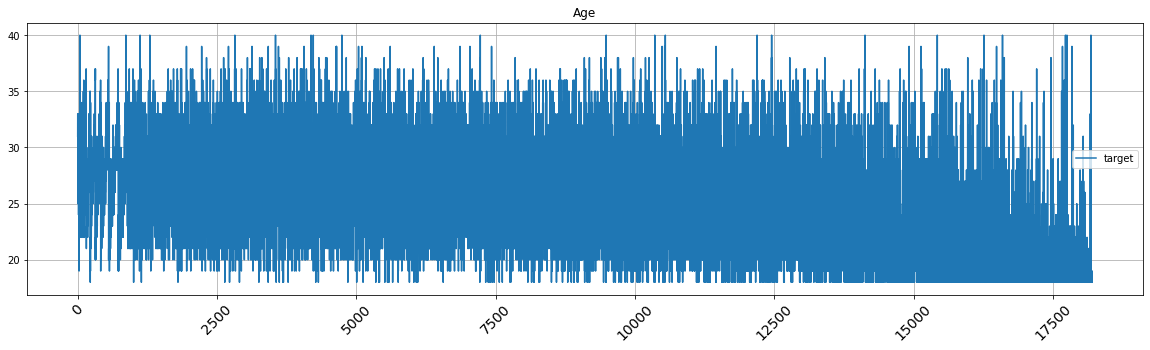

In [376]:
# Let's visualize vehicles data
# How does missing data show up?
plt.figure(figsize=(20,5))
plt.title('Age')
plt.plot(data['Age'], label='target')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

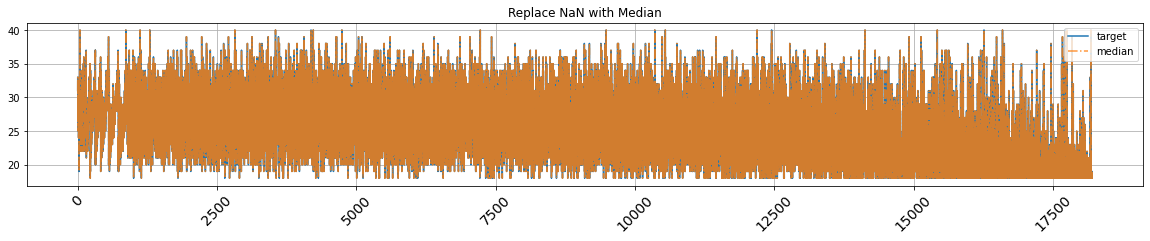

In [377]:
# Replace missing values with mean value for that attribute
plt.figure(figsize=(20,3))
plt.title('Replace NaN with Median')
plt.plot(data['Age'], label='target')

# fillna to replace NaNs with provided value
Age= data['Age'].fillna(data['Age'].median())

plt.plot(Age,ls='-.',alpha=0.8,label='median')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [378]:
data.describe(include="all").T

<ipython-input-378-2462baf01a06>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Name,18207,17194,J. Rodríguez,11,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,18207.0,NaN,NaN,NaN,NaT,NaT,25.141594,4.631926,18.0,21.0,25.0,28.0,40.0
Club,17966,651,Borussia Dortmund,33,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,18207.0,NaN,NaN,NaN,NaT,NaT,2410875.816993,5594855.344909,10000.0,300000.0,675000.0,2000000.0,118500000.0
Wage,18207.0,NaN,NaN,NaN,NaT,NaT,9903.388807,21973.325611,1000.0,1000.0,3000.0,10000.0,565000.0
Special,18207.0,NaN,NaN,NaN,NaT,NaT,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
Preferred_Foot,18159,2,Right,13948,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International_Reputation,18159.0,NaN,NaN,NaN,NaT,NaT,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak_Foot,18159.0,NaN,NaN,NaN,NaT,NaT,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill_Moves,18159.0,NaN,NaN,NaN,NaT,NaT,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0


In [379]:
data = data.fillna(data.median())


<ipython-input-379-1ed84e2e0a3e>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.median())
<ipython-input-379-1ed84e2e0a3e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [380]:
data.isnull().sum()

Name                            0
Age                             0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred_Foot                 48
International_Reputation        0
Weak_Foot                       0
Skill_Moves                     0
Body_Type                      48
Position                       60
Joined                       1553
Loaned_From                 16943
Contract_Valid_Until          289
Release_Clause                  0
Joined_year                  1553
Workrate_attack                48
Workrate_defense               48
Attack_rate                     0
Midfield_rate                   0
Defense_rate                    0
Passing                         0
Shooting                        0
Defending                       0
Speed                           0
Control                         0
GoalKeeping                     0
Mental                          0
Power         

In [381]:
data.dtypes

Name                              category
Age                                float64
Club                              category
Value                              float64
Wage                               float64
Special                            float64
Preferred_Foot                    category
International_Reputation           float64
Weak_Foot                          float64
Skill_Moves                        float64
Body_Type                         category
Position                          category
Joined                      datetime64[ns]
Loaned_From                       category
Contract_Valid_Until              category
Release_Clause                     float64
Joined_year                       category
Workrate_attack                   category
Workrate_defense                  category
Attack_rate                        float64
Midfield_rate                      float64
Defense_rate                       float64
Passing                            float64
Shooting   

In [382]:
data.head()

,Name,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Joined,Loaned_From,Contract_Valid_Until,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents,height_bin,Weight_z_std
0,L. Messi,31.0,FC Barcelona,110500000.0,565000.0,2202.0,Left,5.0,4.0,4.0,Stocky,RF,2004-07-01,NaN,2021,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188.0,South_America,5'6 to 6',-0.447152
1,Cristiano Ronaldo,33.0,Juventus,77000000.0,405000.0,2228.0,Right,5.0,4.0,5.0,Lean,ST,2018-07-10,NaN,2022,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188.0,Europe,Over 6',1.091481
2,Neymar Jr,26.0,Paris Saint-Germain,118500000.0,290000.0,2143.0,Right,5.0,5.0,5.0,Lean,LW,2017-08-03,NaN,2022,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185.0,South_America,5'6 to 6',-1.024139
3,De Gea,27.0,Manchester United,72000000.0,260000.0,1471.0,Right,4.0,3.0,1.0,Lean,GK,2011-07-01,NaN,2020,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184.0,Europe,Over 6',0.129836
4,K. De Bruyne,27.0,Manchester City,102000000.0,355000.0,2281.0,Right,4.0,5.0,4.0,Normal,RCM,2015-08-30,NaN,2023,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183.0,Europe,5'6 to 6',-0.768171


In [383]:
data.isna().sum()

Name                            0
Age                             0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred_Foot                 48
International_Reputation        0
Weak_Foot                       0
Skill_Moves                     0
Body_Type                      48
Position                       60
Joined                       1553
Loaned_From                 16943
Contract_Valid_Until          289
Release_Clause                  0
Joined_year                  1553
Workrate_attack                48
Workrate_defense               48
Attack_rate                     0
Midfield_rate                   0
Defense_rate                    0
Passing                         0
Shooting                        0
Defending                       0
Speed                           0
Control                         0
GoalKeeping                     0
Mental                          0
Power         

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  category      
 1   Age                       18207 non-null  float64       
 2   Club                      17966 non-null  category      
 3   Value                     18207 non-null  float64       
 4   Wage                      18207 non-null  float64       
 5   Special                   18207 non-null  float64       
 6   Preferred_Foot            18159 non-null  category      
 7   International_Reputation  18207 non-null  float64       
 8   Weak_Foot                 18207 non-null  float64       
 9   Skill_Moves               18207 non-null  float64       
 10  Body_Type                 18159 non-null  category      
 11  Position                  18147 non-null  category      
 12  Joined            

In [385]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
data['height_bin'] = data['height_bin'].astype(str).replace('nan', 'is_missing').astype('category')

In [386]:
data.isna().sum()

Name                            0
Age                             0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred_Foot                 48
International_Reputation        0
Weak_Foot                       0
Skill_Moves                     0
Body_Type                      48
Position                       60
Joined                       1553
Loaned_From                 16943
Contract_Valid_Until          289
Release_Clause                  0
Joined_year                  1553
Workrate_attack                48
Workrate_defense               48
Attack_rate                     0
Midfield_rate                   0
Defense_rate                    0
Passing                         0
Shooting                        0
Defending                       0
Speed                           0
Control                         0
GoalKeeping                     0
Mental                          0
Power         

In [387]:
# Drop unwanted columns
data.drop(['Loaned_From'],axis=1,inplace=True)

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  category      
 1   Age                       18207 non-null  float64       
 2   Club                      17966 non-null  category      
 3   Value                     18207 non-null  float64       
 4   Wage                      18207 non-null  float64       
 5   Special                   18207 non-null  float64       
 6   Preferred_Foot            18159 non-null  category      
 7   International_Reputation  18207 non-null  float64       
 8   Weak_Foot                 18207 non-null  float64       
 9   Skill_Moves               18207 non-null  float64       
 10  Body_Type                 18159 non-null  category      
 11  Position                  18147 non-null  category      
 12  Joined            

## Handling Contract Valid Until When

In [389]:
data['Contract_Valid_Until'].value_counts()
contract_dates = pd.to_datetime(data['Contract_Valid_Until']).dt.year
print(contract_dates.value_counts(dropna=False))
data['Contract_Valid_Until'] = contract_dates

2019.0    5920
2021.0    4360
2020.0    4044
2022.0    1477
2023.0    1053
2018.0    1032
NaN        289
2024.0      23
2025.0       7
2026.0       2
Name: Contract_Valid_Until, dtype: int64


In [390]:
# Drop unwanted columns
data.drop(['Joined','Name'],axis=1,inplace=True)

In [391]:
# most rows don't have missing values now
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    16654
1     1264
3      229
7       48
4       12
dtype: int64

In [392]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
Joined_year    1264
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Club                    229
Contract_Valid_Until    229
Joined_year             229
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Club                    12
Position                12
Contract_Valid_Until    12
Joined_year             12
dtype: int64



For the rows with exactly 7 missing values, NAs are found in:
Preferred_Foot          48
Body_Type               48
Position                48
Contract_Valid_Until    48
Joined_year             48
Workrate_attack         48
Workrate_defense        48
dtype: int64





In [393]:
data.isnull().sum()

Age                            0
Club                         241
Value                          0
Wage                           0
Special                        0
Preferred_Foot                48
International_Reputation       0
Weak_Foot                      0
Skill_Moves                    0
Body_Type                     48
Position                      60
Contract_Valid_Until         289
Release_Clause                 0
Joined_year                 1553
Workrate_attack               48
Workrate_defense              48
Attack_rate                    0
Midfield_rate                  0
Defense_rate                   0
Passing                        0
Shooting                       0
Defending                      0
Speed                          0
Control                        0
GoalKeeping                    0
Mental                         0
Power                          0
Avg_rating                     0
Continents                     0
height_bin                     0
Weight_z_s

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       18207 non-null  float64 
 1   Club                      17966 non-null  category
 2   Value                     18207 non-null  float64 
 3   Wage                      18207 non-null  float64 
 4   Special                   18207 non-null  float64 
 5   Preferred_Foot            18159 non-null  category
 6   International_Reputation  18207 non-null  float64 
 7   Weak_Foot                 18207 non-null  float64 
 8   Skill_Moves               18207 non-null  float64 
 9   Body_Type                 18159 non-null  category
 10  Position                  18147 non-null  category
 11  Contract_Valid_Until      17918 non-null  float64 
 12  Release_Clause            18207 non-null  float64 
 13  Joined_year               16654 non-null  cate

### Handling Missing Values for Categorical Variables

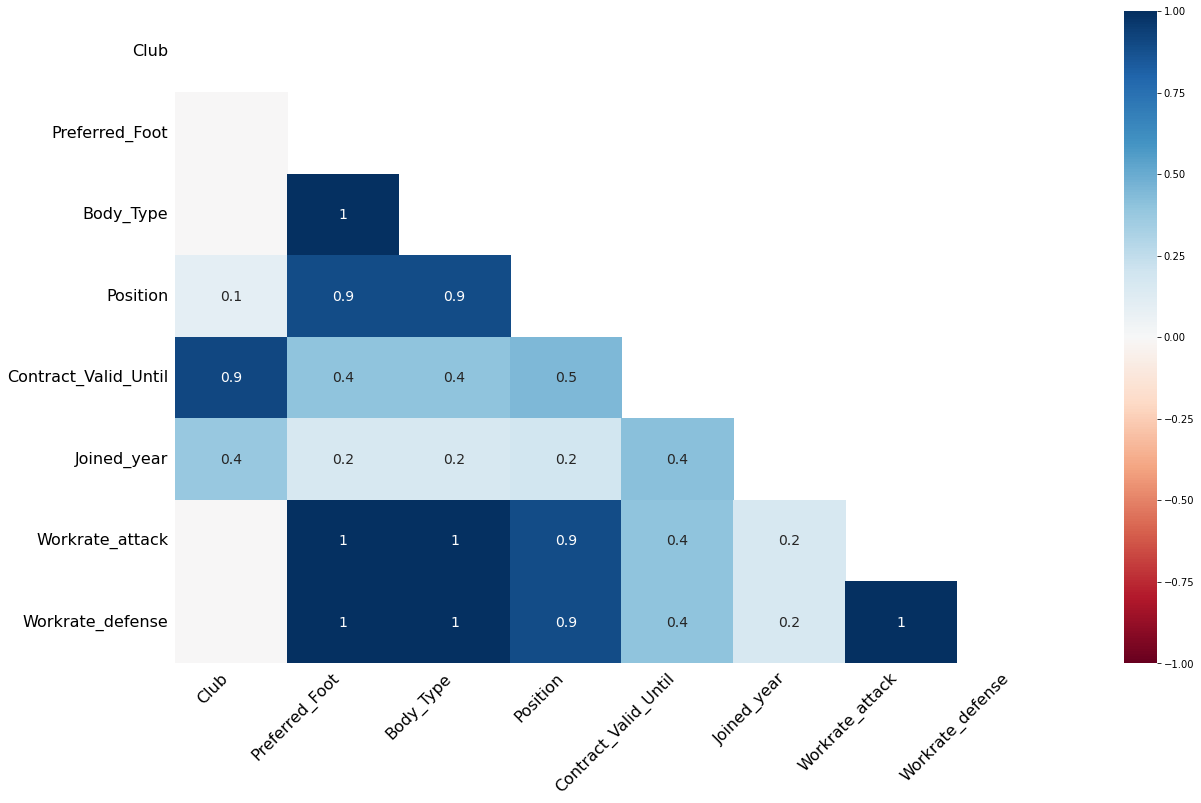

In [395]:
# Program to visualize missing values in dataset

# Importing the libraries
import pandas as pd
import missingno as msno

# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(data)


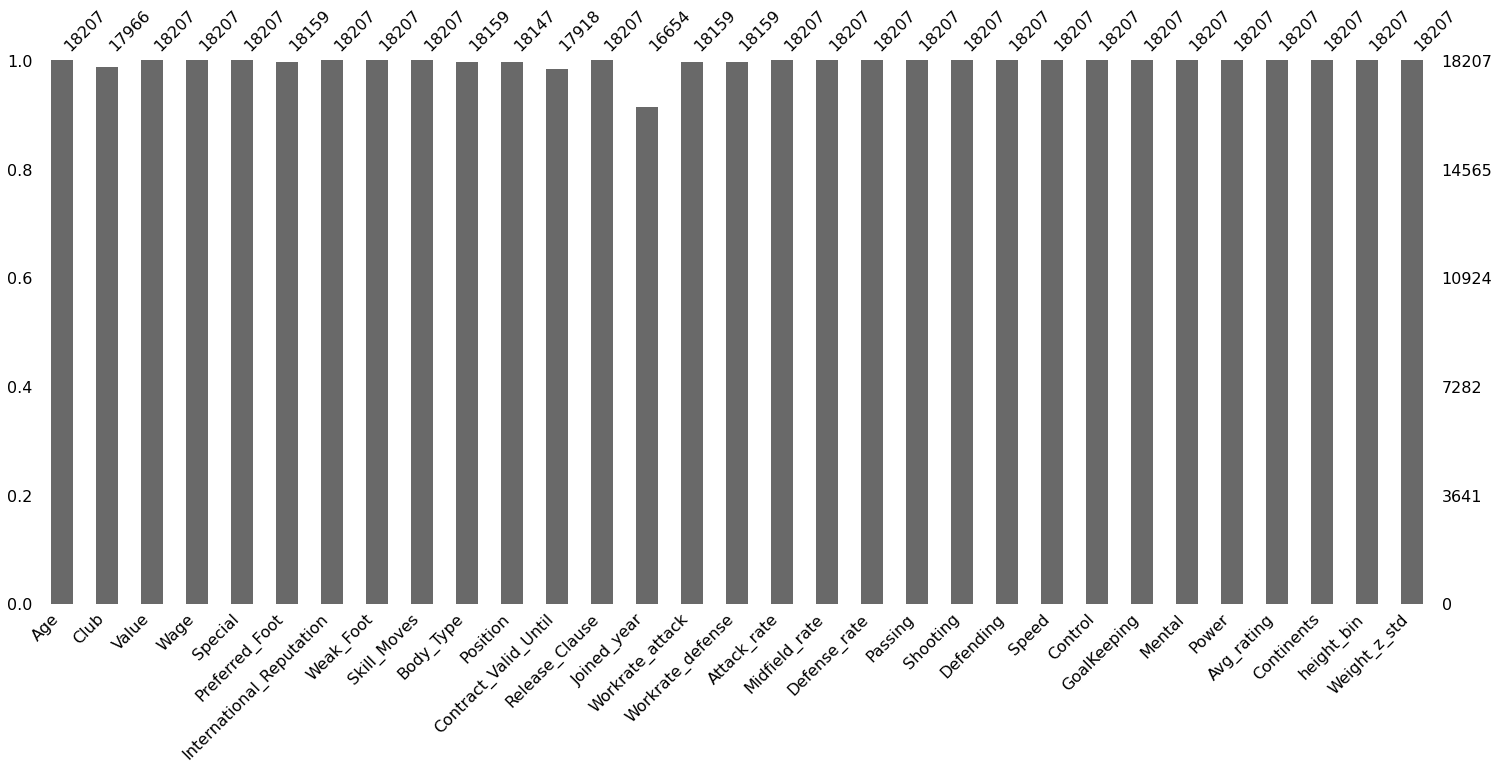

In [397]:
# Program to visualize missing values in dataset

# Importing the libraries
import pandas as pd
import missingno as msno

# Visualize the number of missing
# values as a bar chart
msno.bar(data)

In [398]:
# filling with most common class
df_clean = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean

,Age,Club,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Body_Type,Position,Contract_Valid_Until,Release_Clause,Joined_year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Continents,height_bin,Weight_z_std
0,31.0,FC Barcelona,110500000.0,565000.0,2202.0,Left,5.0,4.0,4.0,Stocky,RF,2021.0,226500000.0,2004.0,Medium,Medium,543.0,1080.0,387.0,261.0,599.0,109.0,435.0,286.0,54.0,332.0,222.0,188.0,South_America,5'6 to 6',-0.447152
1,33.0,Juventus,77000000.0,405000.0,2228.0,Right,5.0,4.0,5.0,Lean,ST,2022.0,127100000.0,2018.0,High,Low,543.0,1044.0,411.0,242.0,619.0,111.0,451.0,263.0,58.0,335.0,244.0,188.0,Europe,Over 6',1.091481
2,26.0,Paris Saint-Germain,118500000.0,290000.0,2143.0,Right,5.0,5.0,5.0,Lean,LW,2022.0,228100000.0,2017.0,High,Medium,519.0,1044.0,391.0,241.0,563.0,120.0,455.0,279.0,59.0,326.0,194.0,185.0,South_America,5'6 to 6',-1.024139
3,27.0,Manchester United,72000000.0,260000.0,1471.0,Right,4.0,3.0,1.0,Lean,GK,2020.0,138600000.0,2011.0,Medium,Medium,0.0,0.0,0.0,118.0,149.0,79.0,308.0,81.0,444.0,186.0,174.0,184.0,Europe,Over 6',0.129836
4,27.0,Manchester City,102000000.0,355000.0,2281.0,Right,4.0,5.0,4.0,Normal,RCM,2023.0,196400000.0,2015.0,High,High,507.0,1106.0,498.0,276.0,563.0,238.0,414.0,262.0,56.0,345.0,215.0,183.0,Europe,5'6 to 6',-0.768171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19.0,Crewe Alexandra,60000.0,1000.0,1307.0,Right,1.0,2.0,2.0,Lean,CM,2019.0,143000.0,2017.0,Medium,Medium,258.0,581.0,313.0,128.0,261.0,181.0,260.0,115.0,47.0,182.0,178.0,112.0,Europe,5'6 to 6',-2.050836
18203,19.0,Trelleborgs FF,60000.0,1000.0,1098.0,Right,1.0,2.0,2.0,Normal,ST,2020.0,113000.0,2018.0,Medium,Medium,261.0,472.0,214.0,91.0,286.0,72.0,201.0,111.0,45.0,168.0,166.0,110.0,Europe,Over 6',0.257112
18204,18.0,Cambridge United,60000.0,1000.0,1189.0,Right,1.0,3.0,2.0,Normal,ST,2021.0,165000.0,2017.0,Medium,Medium,273.0,514.0,218.0,91.0,296.0,71.0,291.0,127.0,40.0,164.0,150.0,114.0,Europe,5'6 to 6',-1.152829
18205,18.0,Tranmere Rovers,60000.0,1000.0,1228.0,Right,1.0,3.0,2.0,Lean,RW,2019.0,143000.0,2018.0,Medium,Medium,279.0,534.0,235.0,118.0,309.0,94.0,234.0,137.0,51.0,170.0,161.0,113.0,Europe,5'6 to 6',-0.768171


In [399]:
df_clean.isnull().sum()

Age                         0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred_Foot              0
International_Reputation    0
Weak_Foot                   0
Skill_Moves                 0
Body_Type                   0
Position                    0
Contract_Valid_Until        0
Release_Clause              0
Joined_year                 0
Workrate_attack             0
Workrate_defense            0
Attack_rate                 0
Midfield_rate               0
Defense_rate                0
Passing                     0
Shooting                    0
Defending                   0
Speed                       0
Control                     0
GoalKeeping                 0
Mental                      0
Power                       0
Avg_rating                  0
Continents                  0
height_bin                  0
Weight_z_std                0
dtype: int64

In [400]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       18207 non-null  float64 
 1   Club                      18207 non-null  category
 2   Value                     18207 non-null  float64 
 3   Wage                      18207 non-null  float64 
 4   Special                   18207 non-null  float64 
 5   Preferred_Foot            18207 non-null  category
 6   International_Reputation  18207 non-null  float64 
 7   Weak_Foot                 18207 non-null  float64 
 8   Skill_Moves               18207 non-null  float64 
 9   Body_Type                 18207 non-null  category
 10  Position                  18207 non-null  category
 11  Contract_Valid_Until      18207 non-null  float64 
 12  Release_Clause            18207 non-null  float64 
 13  Joined_year               18207 non-null  cate